In [1]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_colwidth', -1) #allows us to see everything in a cell of a column. Important for the column text where the tweets are contained
df = pd.read_csv('EndSARStweet.csv')
df.head(3)

,datetime,ID,datetime.1,has_media,is_reply,is_retweet,medias,mentions,nbr_favorite,nbr_reply,nbr_retweet,reply_to,text,url,user_id,usernameTweet
0,2017-12-01 20:22:06-05:00,936933493430513664,2017-12-02 13:22:06,NaN,True,False,NaN,__Gbolahan__ jackdre02,0.0,0.0,4.0,1.197047e+08,@ jackdre02 #EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS,/Iam_Eronz/status/936933493430513664,2.234615e+09,Iam_Eronz
1,2017-12-01 20:26:51-05:00,936934686936494080,2017-12-02 13:26:51,NaN,True,False,NaN,femifactor,21.0,4.0,94.0,1.076309e+08,# EndSARS ... you’re so on point... I experienced their madness on my last visit to Nigeria in October... they constitute nuisance around Iwo road area in Ibadan... the other experience is around Berger axis of Lagos/Ibadan expressway... they stopped me for driving a fancy car,/WilloBaba2000/status/936934686936494080,2.824827e+08,WilloBaba2000
2,2017-12-01 20:26:58-05:00,936934715688439809,2017-12-02 13:26:58,NaN,True,False,NaN,PoliceNG_PCRRU DishyMane,0.0,0.0,1.0,4.002542e+09,@ DishyMane this tweet has scam written all over it #EndSARS,/mzz_chalaywah/status/936934715688439809,1.278504e+09,mzz_chalaywah


In [4]:
#Let's check the columns we have and what data type is stored in them
df.dtypes

datetime         object 
ID               object 
datetime.1       object 
has_media        object 
is_reply         object 
is_retweet       object 
medias           object 
mentions         object 
nbr_favorite     float64
nbr_reply        float64
nbr_retweet      float64
reply_to         float64
text             object 
url              object 
user_id          float64
usernameTweet    object 
dtype: object

In [5]:
#We need to do some cleaning on our dataset. On reviewing the columns we can see that there are two columns named datetime that contain similar contents but we need just one 
#so after looking at the format we decided to remove datetime, as well as url as our analysis wont be needing this column
#rename column datetime.1 to datetime
df = df.drop(columns = ['datetime','url'])
df.rename(columns = {'datetime.1':'datetime'}, inplace = True)
df

,ID,datetime,has_media,is_reply,is_retweet,medias,mentions,nbr_favorite,nbr_reply,nbr_retweet,reply_to,text,user_id,usernameTweet
0,936933493430513664,2017-12-02 13:22:06,NaN,True,False,NaN,__Gbolahan__ jackdre02,0.0,0.0,4.0,1.197047e+08,@ jackdre02 #EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS,2.234615e+09,Iam_Eronz
1,936934686936494080,2017-12-02 13:26:51,NaN,True,False,NaN,femifactor,21.0,4.0,94.0,1.076309e+08,# EndSARS ... you’re so on point... I experienced their madness on my last visit to Nigeria in October... they constitute nuisance around Iwo road area in Ibadan... the other experience is around Berger axis of Lagos/Ibadan expressway... they stopped me for driving a fancy car,2.824827e+08,WilloBaba2000
2,936934715688439809,2017-12-02 13:26:58,NaN,True,False,NaN,PoliceNG_PCRRU DishyMane,0.0,0.0,1.0,4.002542e+09,@ DishyMane this tweet has scam written all over it #EndSARS,1.278504e+09,mzz_chalaywah
3,936936664181723137,2017-12-02 13:34:42,NaN,True,False,NaN,WilloBaba2000 femifactor,15.0,1.0,37.0,2.824827e+08,# EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS,9.340915e+17,Phatlines_
4,936942886888894464,2017-12-02 13:59:26,NaN,True,False,NaN,yabakid ADOVELI,0.0,0.0,0.0,8.598478e+17,# EndSARS,2.588725e+08,CaptainTeach05
5,936947695213858818,2017-12-02 14:18:32,NaN,True,False,NaN,AHoeStory,1.0,1.0,0.0,7.396178e+17,"You too suppose get sense na, #REFORMSARS not #ENDSARS , abi is it you that will replace the vaccum when they go",7.283138e+17,manueltheeone
6,936956656344322048,2017-12-02 14:54:09,NaN,True,False,NaN,Osi_Suave nassyblue,2.0,0.0,2.0,8.662102e+07,@ nassyblue my number 1 question !! Been asking myself for years !!! #EndSARS,4.032850e+08,tito_tttttttttt
7,936958345013092353,2017-12-02 15:00:51,NaN,True,False,NaN,bukolasaraki yates_rob NGRSenate,0.0,0.0,0.0,1.570114e+08,"Sir , #EndSars .",1.130717e+08,I_ortegga
8,936960357943431169,2017-12-02 15:08:51,NaN,True,False,NaN,itsMrChacha a_sholaa wizkidayo iam_Davido,0.0,0.0,1.0,8.404373e+08,# ENDSARS,1.800836e+08,Samraola_
9,936960372539580416,2017-12-02 15:08:55,NaN,True,False,NaN,KingNoCulture,0.0,0.0,0.0,8.889468e+07,"Do you know how many years it will take the law court to judge the case and the money I will waste. I better take the law into my own hands, this December I will buy my gun and I will license it, when I shoot like two of those SARS we will go to court and waste money.\n#EndSARS",8.883247e+17,MichaelXandy5


In [9]:
#we also need to convert the reply_to and user_id to strings instead of floats as these numbers are not for calculation.
df['reply_to'] = df['reply_to'].astype(str)
df['user_id'] = df['user_id'].astype(str)
df.dtypes

ID               object 
datetime         object 
has_media        object 
is_reply         object 
is_retweet       object 
medias           object 
mentions         object 
nbr_favorite     float64
nbr_reply        float64
nbr_retweet      float64
reply_to         object 
text             object 
user_id          object 
usernameTweet    object 
dtype: object

In [10]:
#We need to convert the data in the datetime column to datetime but we must first check what datatypes are stored in the column
#Converting to datetime raises errors so to debug we check the datatypes in the datetime column 
df.datetime.apply(type).value_counts()

<class 'str'>      27607
<class 'float'>    2    
Name: datetime, dtype: int64

In [21]:
#we can see that there are two data types stored in the datetime column so we need to check what rows contain the floats   
df[df.datetime.apply(type) == float]

,ID,datetime,has_media,is_reply,is_retweet,medias,mentions,nbr_favorite,nbr_reply,nbr_retweet,reply_to,text,user_id,usernameTweet
4594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN
24984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN


In [22]:
#We are going to drop these columns with the rubbish data via their index
df = df.drop([4594,24984])
df[df.datetime.apply(type) == float] #check that our drop was sucessful

,ID,datetime,has_media,is_reply,is_retweet,medias,mentions,nbr_favorite,nbr_reply,nbr_retweet,reply_to,text,user_id,usernameTweet


In [23]:
#Now we convert the datetime column to datetime
df['datetime'] = pd.to_datetime(df['datetime'], format = "%Y-%m-%d %H:%M:%S")
df.dtypes

ValueError: time data '1923744997' doesn't match format specified

In [29]:
#However we still can't do that and we get ValueError: time data '1923744997' doesn't match format specified
#We expect the data format of the string to look like this Year-Month-Day Hour:Min:Sec , but '1923744997' is not in that format so wee need to find all the rows that don't have our specified format
df.loc[df.datetime.str.len() != 19] #the lenght of the right date format is 19 so i filtered for cells that did not have this length

,ID,datetime,has_media,is_reply,is_retweet,medias,mentions,nbr_favorite,nbr_reply,nbr_retweet,reply_to,text,user_id,usernameTweet
4564,/mimpsyj/status/937446236357103622,1923744997,mimpsyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN
4595,/mimpsyj/status/937449939499667457,1923744997,mimpsyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN
4688,/mimpsyj/status/937460980237459457,1923744997,mimpsyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN
7504,/TaiHoll/status/937704510138568705,21905696,TaiHoll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN
21444,/HeavyJay16/status/940662685116653569,235546688,HeavyJay16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN
23391,/1morebuch/status/943258666605727744,3065946173,1morebuch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN
24985,/TheAishaJibril/status/950012890551078912,774214838725804032,TheAishaJibril,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN


In [30]:
#Now, we drop the columns that contain rubbish data
df = df.drop([4564,4595,4688,7504,21444,23391,24985])
df.loc[df.datetime.str.len() != 19] #check that it worked


,ID,datetime,has_media,is_reply,is_retweet,medias,mentions,nbr_favorite,nbr_reply,nbr_retweet,reply_to,text,user_id,usernameTweet


In [32]:
#Now we convert the datetime column to datetime
df['datetime'] = pd.to_datetime(df['datetime'], format = "%Y-%m-%d %H:%M:%S")
df.dtypes



ID               object        
datetime         datetime64[ns]
has_media        object        
is_reply         object        
is_retweet       object        
medias           object        
mentions         object        
nbr_favorite     float64       
nbr_reply        float64       
nbr_retweet      float64       
reply_to         object        
text             object        
user_id          object        
usernameTweet    object        
dtype: object

In [34]:
#Let us make the datetime column our index since we would like to carry out some basic time-series analysis to see the progression of the volume of tweeets overtime
df.set_index('datetime', drop = False, inplace =True)
df.index = df.index.tz_localize('GMT').tz_convert('EST')
df.index = df.index - pd.DateOffset(hours=12)
df.index

DatetimeIndex(['2017-12-01 20:22:06-05:00', '2017-12-01 20:26:51-05:00',
               '2017-12-01 20:26:58-05:00', '2017-12-01 20:34:42-05:00',
               '2017-12-01 20:59:26-05:00', '2017-12-01 21:18:32-05:00',
               '2017-12-01 21:54:09-05:00', '2017-12-01 22:00:51-05:00',
               '2017-12-01 22:08:51-05:00', '2017-12-01 22:08:55-05:00',
               ...
               '2018-05-14 21:32:54-05:00', '2018-05-14 22:41:31-05:00',
               '2018-05-14 23:52:45-05:00', '2018-05-14 23:53:55-05:00',
               '2018-05-15 00:36:02-05:00', '2018-05-15 03:58:24-05:00',
               '2018-05-15 04:16:07-05:00', '2018-05-15 04:43:29-05:00',
               '2018-05-15 05:03:32-05:00', '2018-05-15 07:08:14-05:00'],
              dtype='datetime64[ns, EST]', name='datetime', length=27600, freq=None)

In [36]:
#Resample the datetime to 1minute bins
df1m =df['datetime'].resample('1t').count()
df1m.head(5)

datetime
2017-12-01 20:22:00-05:00    1
2017-12-01 20:23:00-05:00    0
2017-12-01 20:24:00-05:00    0
2017-12-01 20:25:00-05:00    0
2017-12-01 20:26:00-05:00    2
Freq: T, Name: datetime, dtype: int64

In [39]:
#Let's do some plotting, we need import the necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

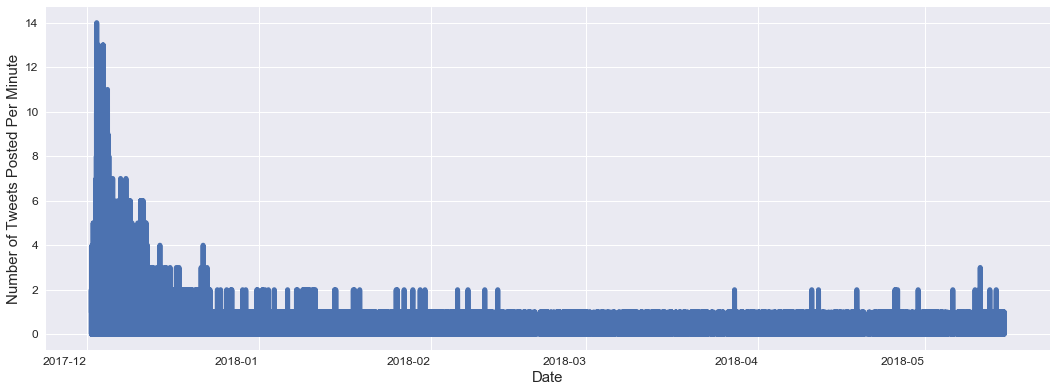

In [40]:
#What was the volume of tweets sent out about #EndSARS every minute?
df1m.plot(figsize =(18,7), linewidth = 5, fontsize = 12)
plt.xticks(rotation = 0)
plt.xlabel('Date', fontsize = 15);
plt.ylabel('Number of Tweets Posted Per Minute', fontsize = 15);
plt.show()

In [41]:

dfH = df['datetime'].resample('H').count()
dfH.nlargest(40)

datetime
2017-12-02 20:00:00-05:00    375
2017-12-02 22:00:00-05:00    346
2017-12-02 19:00:00-05:00    340
2017-12-03 22:00:00-05:00    325
2017-12-04 00:00:00-05:00    324
2017-12-02 21:00:00-05:00    321
2017-12-02 23:00:00-05:00    311
2017-12-03 19:00:00-05:00    308
2017-12-03 02:00:00-05:00    306
2017-12-03 23:00:00-05:00    302
2017-12-03 04:00:00-05:00    296
2017-12-03 01:00:00-05:00    295
2017-12-03 00:00:00-05:00    285
2017-12-03 17:00:00-05:00    281
2017-12-04 01:00:00-05:00    281
2017-12-03 03:00:00-05:00    280
2017-12-03 18:00:00-05:00    264
2017-12-04 03:00:00-05:00    264
2017-12-03 05:00:00-05:00    258
2017-12-03 16:00:00-05:00    254
2017-12-03 21:00:00-05:00    254
2017-12-04 02:00:00-05:00    249
2017-12-04 04:00:00-05:00    242
2017-12-03 15:00:00-05:00    237
2017-12-04 18:00:00-05:00    230
2017-12-03 20:00:00-05:00    229
2017-12-04 15:00:00-05:00    224
2017-12-04 16:00:00-05:00    220
2017-12-04 19:00:00-05:00    205
2017-12-03 14:00:00-05:00    196
2

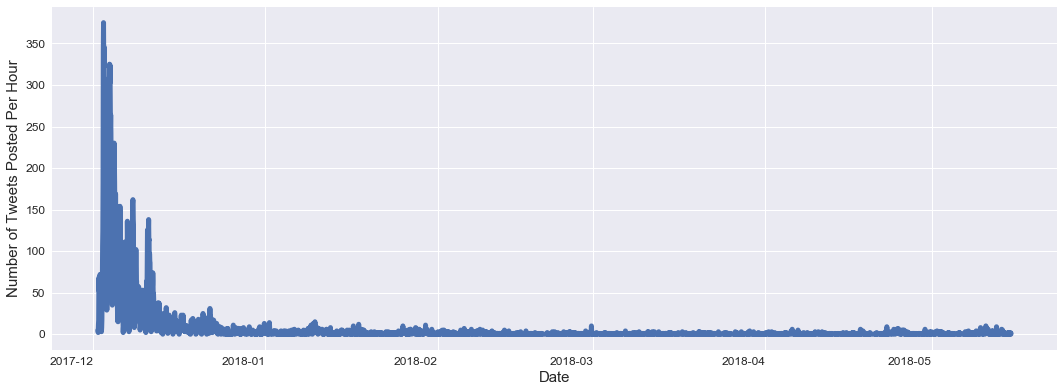

In [42]:
#What was the volume of tweets sent out about #EndSARS every minute?
dfH.plot(figsize =(18,7), linewidth = 5, fontsize = 12)
plt.xticks(rotation = 0)
plt.xlabel('Date', fontsize = 15);
plt.ylabel('Number of Tweets Posted Per Hour', fontsize = 15);
plt.show()

In [22]:
#download nltk library stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/samanthasam-
[nltk_data]     inimgba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
from nltk import FreqDist

In [24]:
#stopwords to remove noise from tweets in Sample 2
import string
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation +  ['', '@ ','&','u'] 
text = df['text']

#tokenize the tweet text
tokens = []
for txt in text.values:
    tokens.extend([t.lower().strip(":,.") for t in txt.split()])
    
filtered_tokens = [w for w in tokens if not w in stop]

In [25]:
freq_dist = nltk.FreqDist(filtered_tokens)
freq_dist.most_common(10000)

[('#endsars', 29755),
 ('sars', 5256),
 ('endsars', 3417),
 ('police', 2669),
 ('people', 2601),
 ('us', 1923),
 ('#reformpoliceng', 1793),
 ('like', 1657),
 ('one', 1609),
 ('#endsarsbrutality', 1535),
 ('know', 1431),
 ('even', 1354),
 ('@policeng', 1328),
 ('see', 1288),
 ('nigeria', 1267),
 ('want', 1265),
 ('go', 1262),
 ('need', 1230),
 ('campaign', 1127),
 ('nigerians', 1051),
 ('still', 1010),
 ('say', 979),
 ('please', 968),
 ('end', 964),
 ('get', 926),
 ('stop', 883),
 ('good', 858),
 ('must', 823),
 ('nigerian', 798),
 ('make', 780),
 ('come', 771),
 ('country', 768),
 ('guys', 767),
 ('citizens', 743),
 ('dey', 741),
 ("can't", 736),
 ('would', 736),
 ('think', 724),
 ('reform', 705),
 ('time', 699),
 ('way', 675),
 ('innocent', 660),
 ('@segalink', 656),
 ('sir', 644),
 ('#endsarsnow', 630),
 ('armed', 623),
 ('god', 621),
 ('take', 620),
 ('said', 608),
 ('never', 593),
 ('let', 588),
 ('nothing', 584),
 ('force', 583),
 ('youths', 582),
 ('man', 570),
 ('right', 565),
 

In [26]:
#preparing x and y axes to be ploted 
XY = freq_dist.items()
#pair x and y and sort the axes
XY = sorted (XY, key=lambda pair: pair[1], reverse= True)
XY.sort(key = lambda pair: pair[1], reverse = True)
limit = 30
#unpair the axes
X = [x for (x,y) in XY[:limit]]
Y = [y for (x,y) in XY[:limit]]
#Transform X into a list of numbers from a list of word tokens
range(4)
nX = range(len(X))
nX


range(0, 30)

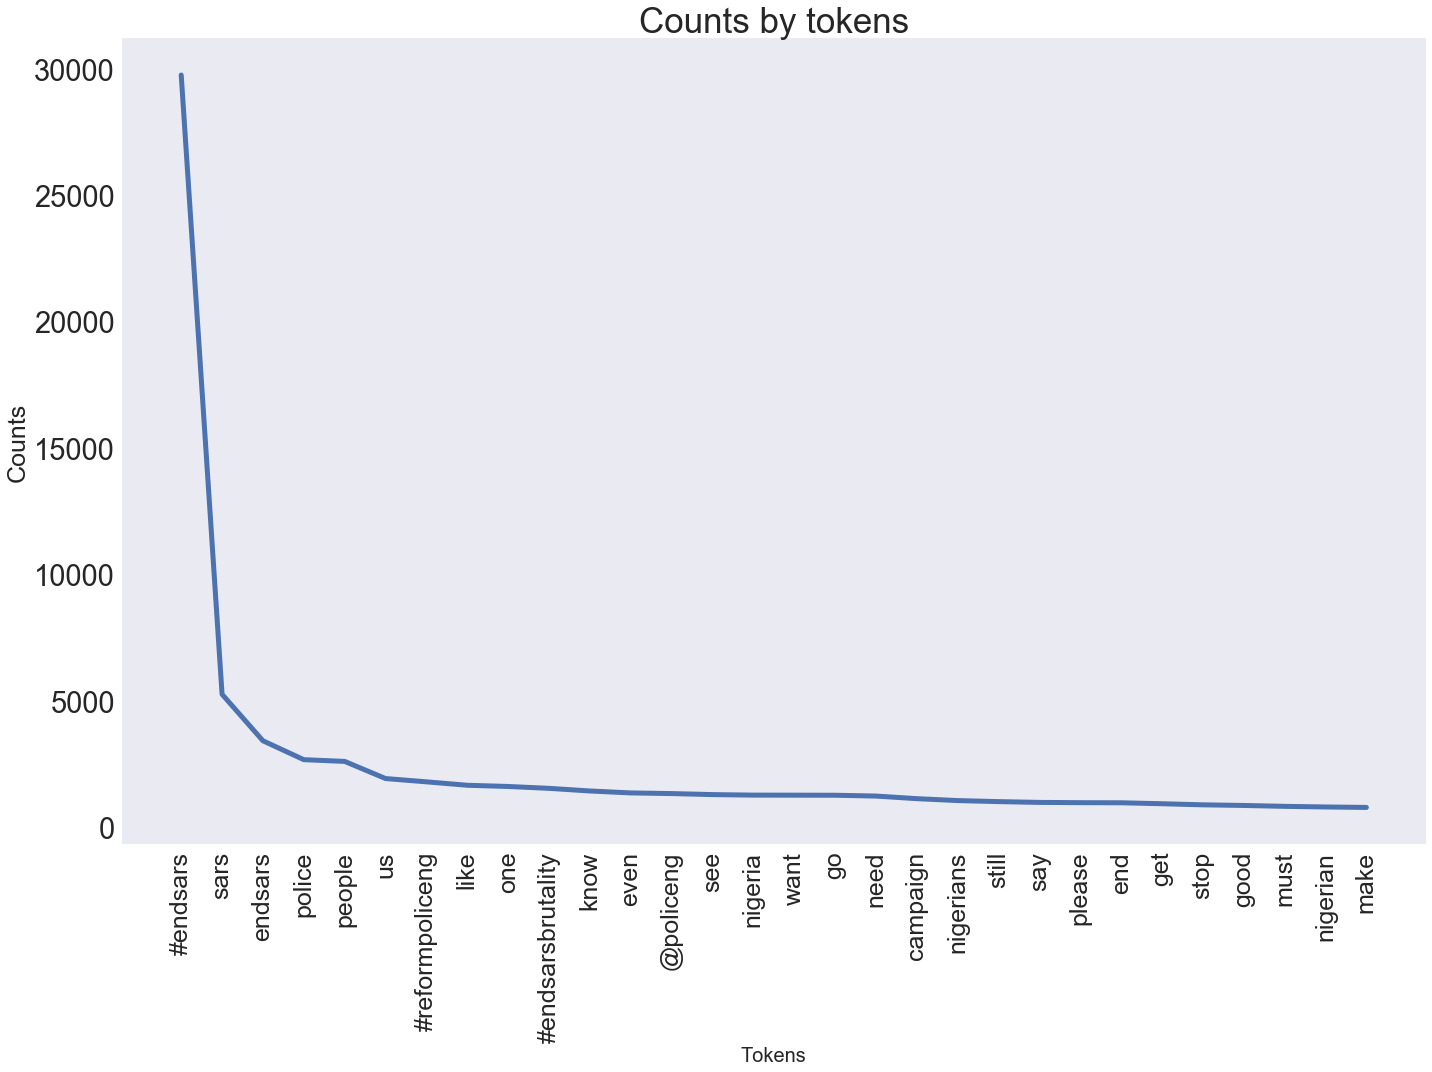

In [27]:
plt.figure(figsize =(20,15))
plt.plot(nX,Y, linewidth = 5)
plt.xticks(nX,X, rotation = 'vertical', fontsize = 25 )
plt.yticks(fontsize = 29 )
plt.xlabel('Tokens', fontsize = 20);
plt.ylabel('Counts', fontsize = 25);
plt.title('Counts by tokens', fontsize = 35)
plt.tight_layout();
plt.grid()
plt.show();


In [28]:
df

,ID,datetime,has_media,is_reply,is_retweet,medias,mentions,nbr_favorite,nbr_reply,nbr_retweet,reply_to,text,url,user_id,usernameTweet
datetime,,,,,,,,,,,,,,,
2017-12-01 20:22:06-05:00,936933493430513664,2017-12-02 13:22:06,NaN,True,False,NaN,__Gbolahan__ jackdre02,0,0,4,119704677,@ jackdre02 #EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS,/Iam_Eronz/status/936933493430513664,2234615224,Iam_Eronz
2017-12-01 20:26:51-05:00,936934686936494080,2017-12-02 13:26:51,NaN,True,False,NaN,femifactor,21,4,94,107630943,# EndSARS ... you’re so on point... I experienced their madness on my last visit to Nigeria in October... they constitute nuisance around Iwo road area in Ibadan... the other experience is around Berger axis of Lagos/Ibadan expressway... they stopped me for driving a fancy car,/WilloBaba2000/status/936934686936494080,282482701,WilloBaba2000
2017-12-01 20:26:58-05:00,936934715688439809,2017-12-02 13:26:58,NaN,True,False,NaN,PoliceNG_PCRRU DishyMane,0,0,1,4002542003,@ DishyMane this tweet has scam written all over it #EndSARS,/mzz_chalaywah/status/936934715688439809,1278504306,mzz_chalaywah
2017-12-01 20:34:42-05:00,936936664181723137,2017-12-02 13:34:42,NaN,True,False,NaN,WilloBaba2000 femifactor,15,1,37,282482701,# EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS,/Phatlines_/status/936936664181723137,934091520331976704,Phatlines_
2017-12-01 20:59:26-05:00,936942886888894464,2017-12-02 13:59:26,NaN,True,False,NaN,yabakid ADOVELI,0,0,0,859847836845969408,# EndSARS,/CaptainTeach05/status/936942886888894464,258872504,CaptainTeach05
2017-12-01 21:18:32-05:00,936947695213858818,2017-12-02 14:18:32,NaN,True,False,NaN,AHoeStory,1,1,0,739617808200421377,"You too suppose get sense na, #REFORMSARS not #ENDSARS , abi is it you that will replace the vaccum when they go",/manueltheeone/status/936947695213858818,728313789460975616,manueltheeone
2017-12-01 21:54:09-05:00,936956656344322048,2017-12-02 14:54:09,NaN,True,False,NaN,Osi_Suave nassyblue,2,0,2,86621018,@ nassyblue my number 1 question !! Been asking myself for years !!! #EndSARS,/tito_tttttttttt/status/936956656344322048,403285014,tito_tttttttttt
2017-12-01 22:00:51-05:00,936958345013092353,2017-12-02 15:00:51,NaN,True,False,NaN,bukolasaraki yates_rob NGRSenate,0,0,0,157011426,"Sir , #EndSars .",/I_ortegga/status/936958345013092353,113071673,I_ortegga
2017-12-01 22:08:51-05:00,936960357943431169,2017-12-02 15:08:51,NaN,True,False,NaN,itsMrChacha a_sholaa wizkidayo iam_Davido,0,0,1,840437342,# ENDSARS,/Samraola_/status/936960357943431169,180083640,Samraola_


In [29]:
#Finding users who were influential based on the number of retweets and replies they garnered. Benchmark is 100
dfPopular = df['nbr_retweet'] > 10
dfPopular2 = df['nbr_reply'] > 10
df[dfPopular & dfPopular2]

,ID,datetime,has_media,is_reply,is_retweet,medias,mentions,nbr_favorite,nbr_reply,nbr_retweet,reply_to,text,url,user_id,usernameTweet
datetime,,,,,,,,,,,,,,,
2017-12-02 19:04:31-05:00,937276355565228034,2017-12-03 12:04:31,NaN,True,False,NaN,YomiShogunle RuthlessAnalyst PoliceNG_PCRRU,32,11,150,775987513,Last night I was in Dreamland; thank God I had a Camera phone to Record this Scene\n\n#EndSARS #\n#SCRAPSARS #\n#KILLSARS pic.twitter.com/esjHRxh1nT,/SexyzKniGhT/status/937276355565228034,827579546203516928,SexyzKniGhT
2017-12-02 19:18:31-05:00,937279877753004032,2017-12-03 12:18:31,NaN,True,False,NaN,Omojuwa mhithi_,77,69,125,115628224,"I support the #EndSARS movement. But i feel ending it without providing alternatives is not the best solution. Cus if the govt renders them unemployed without providing other means of survival for them, they would come back hard on the public and might turn out to be criminals.",/Beamballerh/status/937279877753004032,886537138673782784,Beamballerh
2017-12-02 19:36:39-05:00,937284442707628032,2017-12-03 12:36:39,NaN,True,False,NaN,talkyurshyt YomiShogunle,42,13,29,3406967097,I pray your boyfriend will be fortunate enough to own a good car and probably an iPhone with dreads or flashy haircut then he’s taking you out on a date then those miscreants stops you accuse him wrongly and beat both of you then you will understand #EndSARS,/Legend_Legend07/status/937284442707628032,766047620582301696,Legend_Legend07
2017-12-02 21:03:04-05:00,937306187980247040,2017-12-03 14:03:04,NaN,True,False,NaN,SympLySimi,43,116,36,26216972,Apparently am very sure 80% of this people typing #endsars are yahoo boy.. Am very sure yahoo boys will be the first to raise their voice..,/iamdayoskid/status/937306187980247040,2234503544,iamdayoskid
2017-12-02 21:17:55-05:00,937309928326344704,2017-12-03 14:17:55,NaN,True,False,NaN,iamdayoskid SympLySimi,286,47,224,2234503544,De Gea should've saved small sense for you when he was making saves against #Arsenal last night. \n#ENDSARS,/IamPreshioloye/status/937309928326344704,1537393682,IamPreshioloye
2017-12-02 23:15:29-05:00,937339514166697986,2017-12-03 16:15:29,NaN,True,False,NaN,Ayourb Mr_JAGs,14,12,24,60348900,"Thanks for your submission. The mention of SARS ordinarily irritates most Nigerians. That is why i think the call for the scrap is gathering momentum. The untold stories of those in SARS detention at Oke-Mosan in Abeokuta is damning. If u experience am, U go ask Govt to #EndSARS",/PatrickOnwordi/status/937339514166697986,197376342,PatrickOnwordi
2017-12-03 12:52:31-05:00,937545124401295361,2017-12-04 05:52:31,NaN,True,False,NaN,BashirAhmaad,22,31,22,104296908,"How come no-one have noticed that SARS have helped in the curbing armed robbery in their society? Some of us from the south south region have noticed how SARS have helped in eliminating cultism and social vises. The Nigeria police force needs total reformation, not abt #EndSARS",/Kany_10/status/937545124401295361,735242505957019650,Kany_10
2017-12-03 15:01:46-05:00,937577653355405312,2017-12-04 08:01:46,NaN,True,False,NaN,DONJAZZY,86,14,119,53817066,"While we are on #EndSARS , let's remember also to shout against extortion by police and soldiers on the highways and even streets. \nThey have no shame, they collect N50/N100 as if it is constitutional.\nThey set up 10 checkpoints along 1km and keep collecting with impunity",/iamGreenBrain/status/937577653355405312,2327030764,iamGreenBrain
2017-12-03 19:32:44-05:00,937645845146726400,2017-12-04 12:32:44,NaN,True,False,NaN,PoliceNG ogundamisi Ayourb Omojuwa,297,47,488,470130723,I think you should tweet in proper and correct English! This is the official handle of the Nigeria Police Force not someone's personal account!!!\nCitizens will not be agitating for #EndSARS if your conducts were professional in the first place.\nCopy:\n@ogundamisi @Ayourb @Omojuwa pic.twitter.com/VYBAhvDono,/DrGeeONE/status/937645845146726400,367902955,DrGeeONE


In [30]:
df.dtypes

ID               object        
datetime         datetime64[ns]
has_media        object        
is_reply         bool          
is_retweet       bool          
medias           object        
mentions         object        
nbr_favorite     int64         
nbr_reply        int64         
nbr_retweet      int64         
reply_to         object        
text             object        
url              object        
user_id          object        
usernameTweet    object        
dtype: object

In [31]:
df.to_csv("EndSARStweet1.csv")

In [32]:
df["datetime"]

datetime
2017-12-01 20:22:06-05:00   2017-12-02 13:22:06
2017-12-01 20:26:51-05:00   2017-12-02 13:26:51
2017-12-01 20:26:58-05:00   2017-12-02 13:26:58
2017-12-01 20:34:42-05:00   2017-12-02 13:34:42
2017-12-01 20:59:26-05:00   2017-12-02 13:59:26
2017-12-01 21:18:32-05:00   2017-12-02 14:18:32
2017-12-01 21:54:09-05:00   2017-12-02 14:54:09
2017-12-01 22:00:51-05:00   2017-12-02 15:00:51
2017-12-01 22:08:51-05:00   2017-12-02 15:08:51
2017-12-01 22:08:55-05:00   2017-12-02 15:08:55
2017-12-01 22:11:40-05:00   2017-12-02 15:11:40
2017-12-01 22:15:09-05:00   2017-12-02 15:15:09
2017-12-01 22:17:05-05:00   2017-12-02 15:17:05
2017-12-01 22:33:18-05:00   2017-12-02 15:33:18
2017-12-01 22:35:51-05:00   2017-12-02 15:35:51
2017-12-01 22:41:31-05:00   2017-12-02 15:41:31
2017-12-01 22:42:31-05:00   2017-12-02 15:42:31
2017-12-01 22:46:17-05:00   2017-12-02 15:46:17
2017-12-01 22:52:35-05:00   2017-12-02 15:52:35
2017-12-01 23:02:14-05:00   2017-12-02 16:02:14
2017-12-01 23:03:43-05:00   201

In [33]:
dfD = df['datetime'].resample('D').count()
dfD.sort_values(ascending=False).head(50)

datetime
2017-12-03 00:00:00-05:00    4908
2017-12-04 00:00:00-05:00    3931
2017-12-02 00:00:00-05:00    2736
2017-12-05 00:00:00-05:00    2293
2017-12-08 00:00:00-05:00    1552
2017-12-07 00:00:00-05:00    1357
2017-12-06 00:00:00-05:00    1294
2017-12-10 00:00:00-05:00    1286
2017-12-11 00:00:00-05:00    1199
2017-12-09 00:00:00-05:00    740 
2017-12-12 00:00:00-05:00    548 
2017-12-14 00:00:00-05:00    293 
2017-12-15 00:00:00-05:00    273 
2017-12-13 00:00:00-05:00    254 
2017-12-22 00:00:00-05:00    243 
2017-12-16 00:00:00-05:00    233 
2017-12-17 00:00:00-05:00    229 
2017-12-19 00:00:00-05:00    202 
2017-12-21 00:00:00-05:00    195 
2017-12-20 00:00:00-05:00    175 
2018-01-09 00:00:00-05:00    168 
2017-12-18 00:00:00-05:00    155 
2017-12-23 00:00:00-05:00    111 
2018-01-10 00:00:00-05:00    86  
2017-12-31 00:00:00-05:00    85  
2017-12-26 00:00:00-05:00    73  
2017-12-27 00:00:00-05:00    73  
2018-01-29 00:00:00-05:00    66  
2018-05-10 00:00:00-05:00    66  
2017-

In [34]:
dfselect = df[['text','usernameTweet','nbr_retweet',  'mentions', 'is_reply','has_media']]
dfselect.sort_values('nbr_retweet', ascending = False)

,text,usernameTweet,nbr_retweet,mentions,is_reply,has_media
datetime,,,,,,
2017-12-04 18:00:27-05:00,"my brother killed by kd SARS bcos he refused to partake in money collected frm terrorist,#EndSARS pic.twitter.com/fZyBlDTJes",ayukson2011,564,sanya_timi,True,NaN
2017-12-03 19:32:44-05:00,I think you should tweet in proper and correct English! This is the official handle of the Nigeria Police Force not someone's personal account!!!\nCitizens will not be agitating for #EndSARS if your conducts were professional in the first place.\nCopy:\n@ogundamisi @Ayourb @Omojuwa pic.twitter.com/VYBAhvDono,DrGeeONE,488,PoliceNG ogundamisi Ayourb Omojuwa,True,NaN
2017-12-03 22:48:05-05:00,"Dear IGP, I'm glad that you have ordered an immediate reorganization of SARS. What you probably don't know is that beyond Abuja, no State command implements your directives. The road blocks you ordered to be dismantled are still all over. How do you plan to deal??? #EndSARS",TwtNGInsider,438,PoliceNG,True,NaN
2017-12-08 02:15:54-05:00,We're not calling for SARS reforms\nSARS abuse us\nSARS extort us\nSARS kill us\nSARS check our phones illegally\nSARS threaten us\nSARS are after the youths not the real criminals\nThe real Yahoo boys are SARS friends 'cos they pay them well\nWe can never support SARS\nWe say #EndSARS,IAmChrismike,404,PoliceNG,True,NaN
2017-12-03 20:12:15-05:00,Sarz have killed innocent citizens they where meant to protect. We have various videos of them assaulting citizens and abusing their uniforms and weapons provided to them to protect this same people. This has been going on for years what have you done about it ? #EndSars,Yung6ix,364,PoliceNG,True,NaN
2017-12-02 16:30:00-05:00,Yomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\n#EndSARS,Segun_Awoyera,268,Osi_Suave,True,NaN
2017-12-08 15:33:52-05:00,"@ YomiShogunle did you get time, date and place here? You shamelessly come on air to defend the indefensible. Your generation and that of your ilks will NEVER know peace. Every pain that young boy from the orphanage owner through shall become yours a hundred folds. #EndSARS",Naija_VoxDei,240,IkzCharles YomiShogunle,True,NaN
2017-12-02 22:44:02-05:00,"Some people will come and tell you that this stories are made up but guess what, A lot of families are living that reality right now and the culture of silence must end now. We need to pull up the skirts on what goes on in SARS and it's time to #EndSARS now.",iamwammy,236,Intergrity56 iamHighDee,True,NaN
2017-12-07 03:50:04-05:00,"He has blocked me so he won’t see this. Let them resolve the ones with verified information first. And there are tons of them. Let him also remember that when guns are being pointed at you, your priority will be to stay alive, not ask for your harassers’ ID. #EndSars #AJStream .",Chydee,228,AJStream segalink YomiShogunle vikubaje,True,NaN


In [35]:
#Selecting data from  the 3rd
mask = (df['datetime'] > '2017-12-03') & (df['datetime'] <= '2017-12-04')
dfselect = df.loc[mask]
dfselect[['datetime', 'text','usernameTweet', 'nbr_retweet',
          'mentions']].sort_values('nbr_retweet',ascending = False).head(10)


,datetime,text,usernameTweet,nbr_retweet,mentions
datetime,,,,,
2017-12-02 16:30:00-05:00,2017-12-03 09:30:00,Yomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\n#EndSARS,Segun_Awoyera,268,Osi_Suave
2017-12-02 22:44:02-05:00,2017-12-03 15:44:02,"Some people will come and tell you that this stories are made up but guess what, A lot of families are living that reality right now and the culture of silence must end now. We need to pull up the skirts on what goes on in SARS and it's time to #EndSARS now.",iamwammy,236,Intergrity56 iamHighDee
2017-12-02 21:17:55-05:00,2017-12-03 14:17:55,De Gea should've saved small sense for you when he was making saves against #Arsenal last night. \n#ENDSARS,IamPreshioloye,224,iamdayoskid SympLySimi
2017-12-02 19:19:23-05:00,2017-12-03 12:19:23,"I had terrific experience once. They accosted my younger brothers and search their car. They found nothing but kept harrasing them, so I came and ask why they started beating me n brother then lock us up for the night. Took 40k from us next day.#endsars",GBENGLES,160,Omojuwa
2017-12-02 20:35:56-05:00,2017-12-03 13:35:56,Let Jungle Justice begin on SARS.\nRt if you are with me.\n#EndSARS,agentjoe_,156,i_amveecee
2017-12-02 19:04:31-05:00,2017-12-03 12:04:31,Last night I was in Dreamland; thank God I had a Camera phone to Record this Scene\n\n#EndSARS #\n#SCRAPSARS #\n#KILLSARS pic.twitter.com/esjHRxh1nT,SexyzKniGhT,150,YomiShogunle RuthlessAnalyst PoliceNG_PCRRU
2017-12-02 20:30:28-05:00,2017-12-03 13:30:28,# EndSars \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS \n#EndSARS,Kingingkenko,146,iamTJAN ani_nomso
2017-12-03 04:07:37-05:00,2017-12-03 21:07:37,I know of two people who were killed in Port Harcourt by #Sars because of wearing ear-rings and drawing tattoo on their body. #EndSars,BanjoTaiye,142,Omojuwa
2017-12-02 20:32:49-05:00,2017-12-03 13:32:49,Just look at this barbaric video #ENDSARS pic.twitter.com/fEXDq7hlcU,benedictstone,139,channelstv


In [36]:
#select rows in a column that match a condition
df.loc[df['usernameTweet'] == 'Yung6ix']

,ID,datetime,has_media,is_reply,is_retweet,medias,mentions,nbr_favorite,nbr_reply,nbr_retweet,reply_to,text,url,user_id,usernameTweet
datetime,,,,,,,,,,,,,,,
2017-12-03 20:12:15-05:00,937655790692917248,2017-12-04 13:12:15,NaN,True,False,NaN,PoliceNG,199,10,364,470130723,Sarz have killed innocent citizens they where meant to protect. We have various videos of them assaulting citizens and abusing their uniforms and weapons provided to them to protect this same people. This has been going on for years what have you done about it ? #EndSars,/Yung6ix/status/937655790692917248,71131293,Yung6ix


In [37]:
#sample 2 tweets with media
media = [' pic.twitter.com ', ' pic.twitter ']
dfmedia = df[df['text'].str.contains('pic.twitter.com')]
dfmedia[['datetime','text','usernameTweet',
         'mentions', 'nbr_retweet']].sort_values('nbr_retweet', ascending = False).drop_duplicates()


,datetime,text,usernameTweet,mentions,nbr_retweet
datetime,,,,,
2017-12-04 18:00:27-05:00,2017-12-05 11:00:27,"my brother killed by kd SARS bcos he refused to partake in money collected frm terrorist,#EndSARS pic.twitter.com/fZyBlDTJes",ayukson2011,sanya_timi,564
2017-12-03 19:32:44-05:00,2017-12-04 12:32:44,I think you should tweet in proper and correct English! This is the official handle of the Nigeria Police Force not someone's personal account!!!\nCitizens will not be agitating for #EndSARS if your conducts were professional in the first place.\nCopy:\n@ogundamisi @Ayourb @Omojuwa pic.twitter.com/VYBAhvDono,DrGeeONE,PoliceNG ogundamisi Ayourb Omojuwa,488
2017-12-12 02:07:38-05:00,2017-12-12 19:07:38,"SARS that met Sarz on the beat and did not beat him, is that one even SARS? #EndSARS pic.twitter.com/t9kDiVlzGz",Rouvafe,beatsbysarz,204
2017-12-03 19:52:23-05:00,2017-12-04 12:52:23,Abeg always hide or delete all your post about #ENDSARS before leaving home. They will start searching people with twitter o. #EndSarsNow #EndSarsImpunity #EndSarsBrutality \n#ReformSARS \nThis happened to my friend pic.twitter.com/8EFGtRVxNt,iamgedan,PoliceNG,165
2017-12-03 19:50:27-05:00,2017-12-04 12:50:27,Abeg always hide or delete all your post about #ENDSARS before leaving home. They will start searching people with twitter o. #EndSarsNow #EndSarsImpunity #EndSarsBrutality pic.twitter.com/cIop0e5tmi,iamgedan,PoliceNG,165
2017-12-04 00:46:20-05:00,2017-12-04 17:46:20,We insist on #EndSARS because of incidents like this.... It is a shame that Retired Criminals are given legal backing to use arms.... pic.twitter.com/2yZajvNShy,XANTAPLUS,PoliceNG,152
2017-12-02 19:04:31-05:00,2017-12-03 12:04:31,Last night I was in Dreamland; thank God I had a Camera phone to Record this Scene\n\n#EndSARS #\n#SCRAPSARS #\n#KILLSARS pic.twitter.com/esjHRxh1nT,SexyzKniGhT,YomiShogunle RuthlessAnalyst PoliceNG_PCRRU,150
2017-12-02 20:32:49-05:00,2017-12-03 13:32:49,Just look at this barbaric video #ENDSARS pic.twitter.com/fEXDq7hlcU,benedictstone,channelstv,139
2017-12-03 23:08:39-05:00,2017-12-04 16:08:39,"The term RE-ORGANIZATION sounds more like reshuffling of SARS, such that those terrorizing Lagos, would be deployed to terrorize Abuja. Also PH would be deployed to do same to Benin. \n\nNonsense! \n\nWhat Nigerians DEMAND in clear terms is #EndSARS not RE-ORGANIZE not RESTRUCTURE! pic.twitter.com/XYhtcChyAk",ceonigeria,PoliceNG,126


In [56]:
#sample 1 tweets with media
media2 = [' pic.twitter.com ', ' pic.twitter ']
dfmedia2 = df2[df2['text'].str.contains('pic.twitter.com')]
dfmedia2[['datetime','text','usernameTweet', 
         'nbr_retweet']].sort_values('nbr_retweet', ascending = False).drop_duplicates().head(100)



,datetime,text,usernameTweet,nbr_retweet
datetime,,,,
2017-12-11 20:07:58-05:00,2017-12-12 13:07:58,Video !shows a police officer forcefully breaking the car window of a lady and also pepper spraying her in the face today in Lagos . (Ajiwe Police station ) #EndSARSBrutality #Endsars @segalink @Omojuwa @AmnestyNigeria @ogundamisi @renoomokri @atiku pic.twitter.com/5mraia1Vfl,funshohenri,4217
2017-12-05 15:35:24-05:00,2017-12-06 08:35:24,Basically how a police/Sars arrest happens in Nigeria. #Endsars pic.twitter.com/Zzb8Zfform,ItsBollyLomo,3833
2017-12-07 00:49:45-05:00,2017-12-07 17:49:45,"Let this go viral, retweet and share on all social media platforms. #EndSARS #EndSarsRally pic.twitter.com/iSpK3j7lwF",YemieFASH,3256
2017-12-08 00:41:09-05:00,2017-12-08 17:41:09,A retweet from you will go a long way in our struggle to #EndSARS ! pic.twitter.com/dHAvUt6KCe,CACCOT1,2883
2017-12-10 18:21:16-05:00,2017-12-11 11:21:16,"I understand today is Monday and people have jobs, but if you cannot come, help amplify these protests. RT, share - Twitter, Instagram, Facebook, Snapchat. #EndSARS is happening everywhere, join in. Bless you. pic.twitter.com/YkuP16NZ8t",Chydee,2767
2017-12-05 02:51:36-05:00,2017-12-05 19:51:36,"Hello @PoliceNG , this is Moses Motoni, currently being manhandled SARS officers. His arrest was ordered by lawmakers for sensitizing citizens on the budget in Niger State. #EndSARS pic.twitter.com/09TNd7xVzU",BudgITng,2722
2017-12-14 02:50:19-05:00,2017-12-14 19:50:19,SARS have decided to wage war against the citizenry for money & the @PoliceNG have chosen to back this up with platititudes in the media. #EndSARS #ReformPoliceNG just read this! pic.twitter.com/beUOp1SCxD,segalink,2626
2017-12-12 05:37:54-05:00,2017-12-12 22:37:54,# EndSARS VIDEO: Nigerian Police Officers Brutalizing Nigerian Youths During Arrest @PoliceNG @AsoRock pic.twitter.com/uSpbvwFWHp,SaharaReporters,2386
2017-12-06 22:16:01-05:00,2017-12-07 15:16:01,Off to deliver #EndSARS letters to security agencies. pic.twitter.com/5xQeEs2dBG,adeyanjudeji,2223


In [57]:
dfmedia2H = dfmedia2['datetime'].resample('H').count()
dfmedia2H

datetime
2017-12-04 22:00:00-05:00    50 
2017-12-04 23:00:00-05:00    72 
2017-12-05 00:00:00-05:00    128
2017-12-05 01:00:00-05:00    82 
2017-12-05 02:00:00-05:00    66 
2017-12-05 03:00:00-05:00    95 
2017-12-05 04:00:00-05:00    57 
2017-12-05 05:00:00-05:00    74 
2017-12-05 06:00:00-05:00    52 
2017-12-05 07:00:00-05:00    36 
2017-12-05 08:00:00-05:00    29 
2017-12-05 09:00:00-05:00    21 
2017-12-05 10:00:00-05:00    22 
2017-12-05 11:00:00-05:00    10 
2017-12-05 12:00:00-05:00    16 
2017-12-05 13:00:00-05:00    35 
2017-12-05 14:00:00-05:00    75 
2017-12-05 15:00:00-05:00    89 
2017-12-05 16:00:00-05:00    76 
2017-12-05 17:00:00-05:00    70 
2017-12-05 18:00:00-05:00    66 
2017-12-05 19:00:00-05:00    70 
2017-12-05 20:00:00-05:00    62 
2017-12-05 21:00:00-05:00    52 
2017-12-05 22:00:00-05:00    59 
2017-12-05 23:00:00-05:00    41 
2017-12-06 00:00:00-05:00    36 
2017-12-06 01:00:00-05:00    39 
2017-12-06 02:00:00-05:00    32 
2017-12-06 03:00:00-05:00    61 
 

In [39]:
#peak period = 3rd dec to 12 
peak = (df['datetime'] > "2017-12-02") & (df['datetime'] <= "2017-12-13")
dfpeak = df.loc[peak]
dfpeak[['datetime','usernameTweet','nbr_retweet',
        'mentions','is_reply']].sort_values('nbr_retweet', ascending = False)

,datetime,usernameTweet,nbr_retweet,mentions,is_reply
datetime,,,,,
2017-12-04 18:00:27-05:00,2017-12-05 11:00:27,ayukson2011,564,sanya_timi,True
2017-12-03 19:32:44-05:00,2017-12-04 12:32:44,DrGeeONE,488,PoliceNG ogundamisi Ayourb Omojuwa,True
2017-12-03 22:48:05-05:00,2017-12-04 15:48:05,TwtNGInsider,438,PoliceNG,True
2017-12-08 02:15:54-05:00,2017-12-08 19:15:54,IAmChrismike,404,PoliceNG,True
2017-12-03 20:12:15-05:00,2017-12-04 13:12:15,Yung6ix,364,PoliceNG,True
2017-12-02 16:30:00-05:00,2017-12-03 09:30:00,Segun_Awoyera,268,Osi_Suave,True
2017-12-08 15:33:52-05:00,2017-12-09 08:33:52,Naija_VoxDei,240,IkzCharles YomiShogunle,True
2017-12-02 22:44:02-05:00,2017-12-03 15:44:02,iamwammy,236,Intergrity56 iamHighDee,True
2017-12-07 03:50:04-05:00,2017-12-07 20:50:04,Chydee,228,AJStream segalink YomiShogunle vikubaje,True


In [40]:
#top tweets of sample 2
dfpeak = df[['datetime','text','usernameTweet','nbr_retweet',
        'mentions','is_reply']]
dfpeak.sort_values('nbr_retweet', ascending = False).head(10)

,datetime,text,usernameTweet,nbr_retweet,mentions,is_reply
datetime,,,,,,
2017-12-04 18:00:27-05:00,2017-12-05 11:00:27,"my brother killed by kd SARS bcos he refused to partake in money collected frm terrorist,#EndSARS pic.twitter.com/fZyBlDTJes",ayukson2011,564,sanya_timi,True
2017-12-03 19:32:44-05:00,2017-12-04 12:32:44,I think you should tweet in proper and correct English! This is the official handle of the Nigeria Police Force not someone's personal account!!!\nCitizens will not be agitating for #EndSARS if your conducts were professional in the first place.\nCopy:\n@ogundamisi @Ayourb @Omojuwa pic.twitter.com/VYBAhvDono,DrGeeONE,488,PoliceNG ogundamisi Ayourb Omojuwa,True
2017-12-03 22:48:05-05:00,2017-12-04 15:48:05,"Dear IGP, I'm glad that you have ordered an immediate reorganization of SARS. What you probably don't know is that beyond Abuja, no State command implements your directives. The road blocks you ordered to be dismantled are still all over. How do you plan to deal??? #EndSARS",TwtNGInsider,438,PoliceNG,True
2017-12-08 02:15:54-05:00,2017-12-08 19:15:54,We're not calling for SARS reforms\nSARS abuse us\nSARS extort us\nSARS kill us\nSARS check our phones illegally\nSARS threaten us\nSARS are after the youths not the real criminals\nThe real Yahoo boys are SARS friends 'cos they pay them well\nWe can never support SARS\nWe say #EndSARS,IAmChrismike,404,PoliceNG,True
2017-12-03 20:12:15-05:00,2017-12-04 13:12:15,Sarz have killed innocent citizens they where meant to protect. We have various videos of them assaulting citizens and abusing their uniforms and weapons provided to them to protect this same people. This has been going on for years what have you done about it ? #EndSars,Yung6ix,364,PoliceNG,True
2017-12-02 16:30:00-05:00,2017-12-03 09:30:00,Yomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\nYomi Shogunle should be sacked.\n\n#EndSARS,Segun_Awoyera,268,Osi_Suave,True
2017-12-08 15:33:52-05:00,2017-12-09 08:33:52,"@ YomiShogunle did you get time, date and place here? You shamelessly come on air to defend the indefensible. Your generation and that of your ilks will NEVER know peace. Every pain that young boy from the orphanage owner through shall become yours a hundred folds. #EndSARS",Naija_VoxDei,240,IkzCharles YomiShogunle,True
2017-12-02 22:44:02-05:00,2017-12-03 15:44:02,"Some people will come and tell you that this stories are made up but guess what, A lot of families are living that reality right now and the culture of silence must end now. We need to pull up the skirts on what goes on in SARS and it's time to #EndSARS now.",iamwammy,236,Intergrity56 iamHighDee,True
2017-12-07 03:50:04-05:00,2017-12-07 20:50:04,"He has blocked me so he won’t see this. Let them resolve the ones with verified information first. And there are tons of them. Let him also remember that when guns are being pointed at you, your priority will be to stay alive, not ask for your harassers’ ID. #EndSars #AJStream .",Chydee,228,AJStream segalink YomiShogunle vikubaje,True


In [41]:
#text analysis to find out the most mentioned twitter users in thhe peak period 
stop = stopwords.words('english')
mentions = dfpeak['usernameTweet']


tokens = []
for txt in mentions.values:
    tokens.extend([t.lower().strip(":,.") for t in txt.split()])
    
filtered_tokens = [w for w in tokens if not w in stop]
freq_dist = nltk.FreqDist(filtered_tokens)
freq_dist.most_common(20)

[('segalink', 237),
 ('nelo_x', 191),
 ('sholayeetete', 144),
 ('sundaywilly', 131),
 ('caccot1', 130),
 ('goldgems11', 129),
 ('ex_immigrant', 119),
 ('obytwic', 106),
 ('tunchy_tnd', 82),
 ('hildash8', 74),
 ('esemarbl', 70),
 ('patrickonwordi', 69),
 ('ja_olaoye', 67),
 ('djmcence', 62),
 ('wedemandjustic1', 60),
 ('tonyakabuno', 60),
 ('oyomwano', 59),
 ('ohenkay', 58),
 ('airiafo', 58),
 ('iamwammy', 55)]

In [43]:
#text analysis to find out the most mentioned twitter users in the offpeak period 
stop = stopwords.words('english')
mentions = dfoffpeak['usernameTweet']


tokens = []
for txt in mentions.values:
    tokens.extend([t.lower().strip(":,.") for t in txt.split()])
    
filtered_tokens = [w for w in tokens if not w in stop]
freq_dist = nltk.FreqDist(filtered_tokens)
freq_dist.most_common(20)

[('sundaywilly', 25),
 ('segalink', 20),
 ('ohenkay', 19),
 ('goldgems11', 14),
 ('sholayeetete', 13),
 ('ex_immigrant', 13),
 ('hildash8', 12),
 ('obytwic', 10),
 ('caccot1', 7),
 ('moskillz4u', 7),
 ('airiafo', 6),
 ('fynefaze', 6),
 ('engineerbolex', 5),
 ('uglyking______', 5),
 ('iykepfs', 5),
 ('callmelekan', 5),
 ('psaphirreiii', 5),
 ('uh_chay', 4),
 ('hackanimore', 4),
 ('kingchioms', 4)]

In [42]:
#peak period =  1jan to  13jan
offpeak = (df['datetime'] > "2017-12-31") & (df['datetime'] <= "2018-01-13")
dfoffpeak = df.loc[offpeak]
dfoffpeak[['datetime','usernameTweet','nbr_retweet',
        'mentions','is_reply']].sort_values('nbr_retweet', ascending = False)

,datetime,usernameTweet,nbr_retweet,mentions,is_reply
datetime,,,,,
2018-01-09 09:07:46-05:00,2018-01-10 02:07:46,PsaphirreIII,54,IsimaOdeh,True
2018-01-09 21:13:29-05:00,2018-01-10 14:13:29,olabanjoanthony,30,ani_nomso,True
2018-01-09 05:27:20-05:00,2018-01-09 22:27:20,PsaphirreIII,27,RuggedyBaba PoliceNG benmurraybruce SaharaReporters nairawall breakingnewsnig HipTv DeleMomodu bukolasaraki realFFK segalink ahYouAlearner,True
2018-01-08 15:38:00-05:00,2018-01-09 08:38:00,ScarTissue101,23,PoliceNG MBuhari,True
2018-01-06 00:37:24-05:00,2018-01-06 17:37:24,segalink,22,lloydatiku,True
2018-01-02 17:11:09-05:00,2018-01-03 10:11:09,GhenhisKhan,20,Intergrity56 PoliceNG aleeygiwa segalink,True
2018-01-09 15:47:47-05:00,2018-01-10 08:47:47,XANTAPLUS,19,PoliceNG YomiShogunle PoliceNG_PCRRU,True
2018-01-09 17:05:37-05:00,2018-01-10 10:05:37,ekesunvictor,18,achumba_tony,True
2018-01-09 16:37:40-05:00,2018-01-10 09:37:40,AireJosh1,18,segalink,True


In [45]:
#the whole time period of analysis to find out the users with the most retweets
df[['datetime','usernameTweet','nbr_retweet',
        'mentions','is_reply']].sort_values('nbr_retweet', ascending = False ).head(50)


,datetime,usernameTweet,nbr_retweet,mentions,is_reply
datetime,,,,,
2017-12-04 18:00:27-05:00,2017-12-05 11:00:27,ayukson2011,564,sanya_timi,True
2017-12-03 19:32:44-05:00,2017-12-04 12:32:44,DrGeeONE,488,PoliceNG ogundamisi Ayourb Omojuwa,True
2017-12-03 22:48:05-05:00,2017-12-04 15:48:05,TwtNGInsider,438,PoliceNG,True
2017-12-08 02:15:54-05:00,2017-12-08 19:15:54,IAmChrismike,404,PoliceNG,True
2017-12-03 20:12:15-05:00,2017-12-04 13:12:15,Yung6ix,364,PoliceNG,True
2017-12-02 16:30:00-05:00,2017-12-03 09:30:00,Segun_Awoyera,268,Osi_Suave,True
2017-12-08 15:33:52-05:00,2017-12-09 08:33:52,Naija_VoxDei,240,IkzCharles YomiShogunle,True
2017-12-02 22:44:02-05:00,2017-12-03 15:44:02,iamwammy,236,Intergrity56 iamHighDee,True
2017-12-07 03:50:04-05:00,2017-12-07 20:50:04,Chydee,228,AJStream segalink YomiShogunle vikubaje,True


In [46]:
files = glob.glob('tweet/*')

In [47]:
len(files)

82771

In [48]:
dictlist1 = []

In [49]:
for file in files:
    json_string = open(file, 'r').read()
    json_dict = json.loads(json_string)
    dictlist1.append(json_dict)

In [50]:
pd.set_option('display.max_colwidth', -1)
df2 = pd.DataFrame(dictlist1)

In [51]:
df2.head()

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
0,938053902414635008,2017-12-05 15:34:13,NaN,True,False,NaN,0,1,0,Yeah well I don't know him. Just gave my opinion based on the things i read. God knows them. Lol. But a right now. #ENDSARS,/KingAshylebs/status/938053902414635008,143452318,KingAshylebs
1,938053906369843200,2017-12-05 15:34:14,NaN,False,False,NaN,1,0,1,"Our lives are no longer safe with those dumb personnel called SARS.. When u try to explain they will cock gun point at you saying if you don't keep your mouth shut you will be shot.. We are citizen of this great country Nigeria, where has our human right gone? #EndSARS",/Honp_dyon/status/938053906369843200,3365608990,Honp_dyon
2,938053939089489921,2017-12-05 15:34:21,NaN,False,False,NaN,0,0,0,We def sleeping on this #ENDSARS thingy until they fix it,/Grind2fourhrs/status/938053939089489921,392244864,Grind2fourhrs
3,938053960325324800,2017-12-05 15:34:26,NaN,False,False,NaN,3,1,10,"Misau, ex-police officer turned senator, says ‘SARS is used to intimidate politicians’ | TheCable http:// bit.ly/2BC4c09 #EndSARS pic.twitter.com/dGsZsAjpZj",/thecableng/status/938053960325324800,1954402777,thecableng
4,938053964351893507,2017-12-05 15:34:27,NaN,False,False,NaN,1,0,0,SARS is as useless as the ‘A’ in SRS\n\n#EndSARS pic.twitter.com/JvazLdGSse,/iam_Feccojunior/status/938053964351893507,366520398,iam_Feccojunior


In [52]:
#Transform datetime column to a datetime object
df2['datetime'] = pd.to_datetime(df2['datetime'])
df2

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
0,938053902414635008,2017-12-05 15:34:13,NaN,True,False,NaN,0,1,0,Yeah well I don't know him. Just gave my opinion based on the things i read. God knows them. Lol. But a right now. #ENDSARS,/KingAshylebs/status/938053902414635008,143452318,KingAshylebs
1,938053906369843200,2017-12-05 15:34:14,NaN,False,False,NaN,1,0,1,"Our lives are no longer safe with those dumb personnel called SARS.. When u try to explain they will cock gun point at you saying if you don't keep your mouth shut you will be shot.. We are citizen of this great country Nigeria, where has our human right gone? #EndSARS",/Honp_dyon/status/938053906369843200,3365608990,Honp_dyon
2,938053939089489921,2017-12-05 15:34:21,NaN,False,False,NaN,0,0,0,We def sleeping on this #ENDSARS thingy until they fix it,/Grind2fourhrs/status/938053939089489921,392244864,Grind2fourhrs
3,938053960325324800,2017-12-05 15:34:26,NaN,False,False,NaN,3,1,10,"Misau, ex-police officer turned senator, says ‘SARS is used to intimidate politicians’ | TheCable http:// bit.ly/2BC4c09 #EndSARS pic.twitter.com/dGsZsAjpZj",/thecableng/status/938053960325324800,1954402777,thecableng
4,938053964351893507,2017-12-05 15:34:27,NaN,False,False,NaN,1,0,0,SARS is as useless as the ‘A’ in SRS\n\n#EndSARS pic.twitter.com/JvazLdGSse,/iam_Feccojunior/status/938053964351893507,366520398,iam_Feccojunior
5,938054037513166850,2017-12-05 15:34:45,NaN,False,False,NaN,0,0,0,Where are all the money the #SARS have been collecting from people for bail since sef???..#EndSARS #Bailisnotfree,/Weseency/status/938054037513166850,420879775,Weseency
6,938054081482027009,2017-12-05 15:34:55,NaN,False,False,NaN,0,0,0,The blood of innocents they have killed is the reason their childrens are never responsible #EndSARS,/oliversamonline/status/938054081482027009,3207426299,oliversamonline
7,938054093922238464,2017-12-05 15:34:58,NaN,False,False,NaN,0,0,0,# ENDSARS https:// twitter.com/segalink/statu s/938051289170284545 …,/IAM_LUDAR/status/938054093922238464,3354821530,IAM_LUDAR
8,938054116550561792,2017-12-05 15:35:04,NaN,False,False,NaN,0,0,0,"Many of us are talking about SARS like the govt instituted it to oppress Nigerians, on contrary, they're to protect. I guess what they became goes a long way to show the kind of people many Nigerians are.\n#ReformSARS not #EndSARS",/skeedo9/status/938054116550561792,97704805,skeedo9
9,938054123408289792,2017-12-05 15:35:05,NaN,False,False,NaN,1,0,0,# EndSars Do what is expected of you That’s all we need from you,/Omobaba008/status/938054123408289792,1249307966,Omobaba008


In [53]:
#set datetime as the index
df2.set_index('datetime', drop = False, inplace =True)
df2.index = df2.index.tz_localize('GMT').tz_convert('EST')
df2.index = df2.index - pd.DateOffset(hours=12)
df2.index

DatetimeIndex(['2017-12-04 22:34:13-05:00', '2017-12-04 22:34:14-05:00',
               '2017-12-04 22:34:21-05:00', '2017-12-04 22:34:26-05:00',
               '2017-12-04 22:34:27-05:00', '2017-12-04 22:34:45-05:00',
               '2017-12-04 22:34:55-05:00', '2017-12-04 22:34:58-05:00',
               '2017-12-04 22:35:04-05:00', '2017-12-04 22:35:05-05:00',
               ...
               '2018-05-03 01:37:20-05:00', '2018-05-03 02:08:56-05:00',
               '2018-05-03 02:37:13-05:00', '2018-05-03 03:58:06-05:00',
               '2018-05-03 04:41:05-05:00', '2018-05-03 05:26:31-05:00',
               '2018-05-03 05:30:14-05:00', '2018-05-03 06:34:09-05:00',
               '2018-05-03 06:38:53-05:00', '2018-05-03 06:47:24-05:00'],
              dtype='datetime64[ns, EST]', name='datetime', length=82771, freq=None)

In [54]:
#Resample date time by per hour
df21m= df2['datetime'].resample('H').count()
df21m

datetime
2017-12-04 22:00:00-05:00    295
2017-12-04 23:00:00-05:00    645
2017-12-05 00:00:00-05:00    879
2017-12-05 01:00:00-05:00    704
2017-12-05 02:00:00-05:00    649
2017-12-05 03:00:00-05:00    685
2017-12-05 04:00:00-05:00    622
2017-12-05 05:00:00-05:00    556
2017-12-05 06:00:00-05:00    545
2017-12-05 07:00:00-05:00    345
2017-12-05 08:00:00-05:00    198
2017-12-05 09:00:00-05:00    142
2017-12-05 10:00:00-05:00    89 
2017-12-05 11:00:00-05:00    95 
2017-12-05 12:00:00-05:00    136
2017-12-05 13:00:00-05:00    344
2017-12-05 14:00:00-05:00    768
2017-12-05 15:00:00-05:00    942
2017-12-05 16:00:00-05:00    963
2017-12-05 17:00:00-05:00    790
2017-12-05 18:00:00-05:00    595
2017-12-05 19:00:00-05:00    722
2017-12-05 20:00:00-05:00    707
2017-12-05 21:00:00-05:00    614
2017-12-05 22:00:00-05:00    508
2017-12-05 23:00:00-05:00    489
2017-12-06 00:00:00-05:00    396
2017-12-06 01:00:00-05:00    344
2017-12-06 02:00:00-05:00    342
2017-12-06 03:00:00-05:00    389
 

In [58]:
dfmedia2H

datetime
2017-12-04 22:00:00-05:00    50 
2017-12-04 23:00:00-05:00    72 
2017-12-05 00:00:00-05:00    128
2017-12-05 01:00:00-05:00    82 
2017-12-05 02:00:00-05:00    66 
2017-12-05 03:00:00-05:00    95 
2017-12-05 04:00:00-05:00    57 
2017-12-05 05:00:00-05:00    74 
2017-12-05 06:00:00-05:00    52 
2017-12-05 07:00:00-05:00    36 
2017-12-05 08:00:00-05:00    29 
2017-12-05 09:00:00-05:00    21 
2017-12-05 10:00:00-05:00    22 
2017-12-05 11:00:00-05:00    10 
2017-12-05 12:00:00-05:00    16 
2017-12-05 13:00:00-05:00    35 
2017-12-05 14:00:00-05:00    75 
2017-12-05 15:00:00-05:00    89 
2017-12-05 16:00:00-05:00    76 
2017-12-05 17:00:00-05:00    70 
2017-12-05 18:00:00-05:00    66 
2017-12-05 19:00:00-05:00    70 
2017-12-05 20:00:00-05:00    62 
2017-12-05 21:00:00-05:00    52 
2017-12-05 22:00:00-05:00    59 
2017-12-05 23:00:00-05:00    41 
2017-12-06 00:00:00-05:00    36 
2017-12-06 01:00:00-05:00    39 
2017-12-06 02:00:00-05:00    32 
2017-12-06 03:00:00-05:00    61 
 

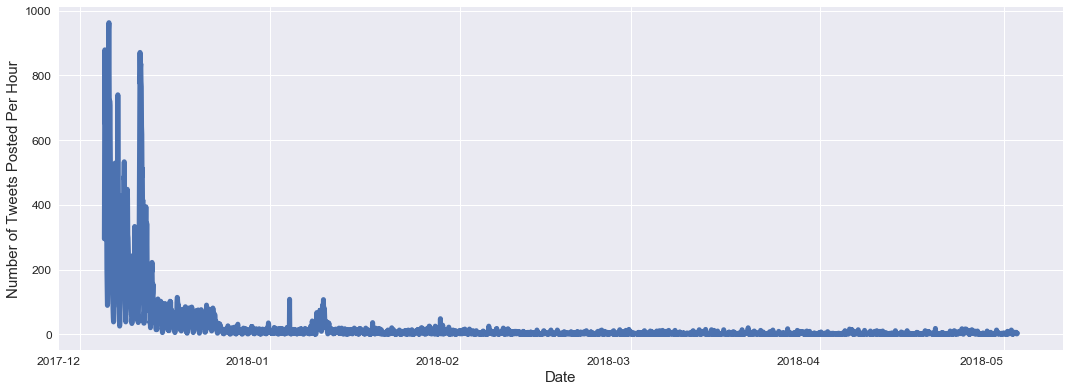

In [55]:
#Plot the volume of tweets over time for sample 1
df21m.plot(figsize =(18,7), linewidth = 5, fontsize = 12)
plt.xticks(rotation = 0)
plt.xlabel('Date', fontsize = 15);
plt.ylabel('Number of Tweets Posted Per Hour', fontsize = 15);
plt.show()

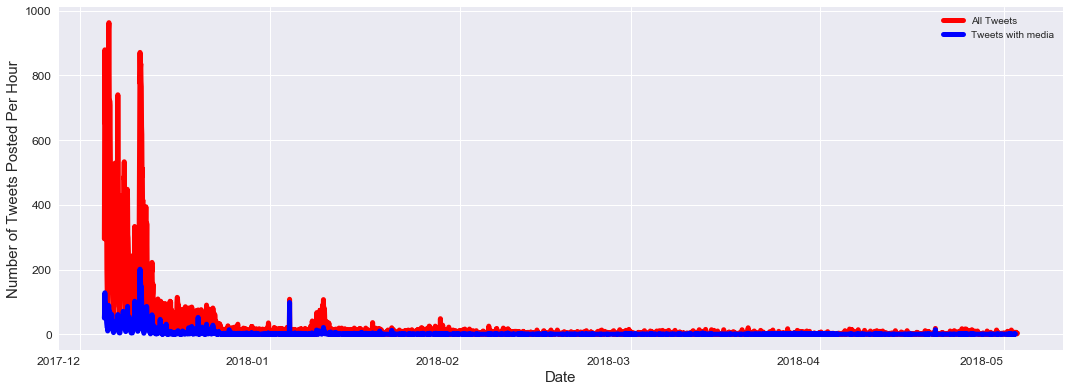

In [59]:
fig, ax = plt.subplots()
df21m.plot(color = 'r', figsize =(18,7), linewidth = 5, fontsize = 12, label = 'All Tweets')
dfmedia2H.plot(color = 'b', figsize =(18,7), linewidth = 5, fontsize = 12, label = 'Tweets with media')
plt.xticks(rotation = 0)
plt.xlabel('Date', fontsize = 15);
plt.ylabel('Number of Tweets Posted Per Hour', fontsize = 15);
plt.legend()
plt.show()

In [60]:
df2D = df2['datetime'].resample('D').count()
df2D.sort_values(ascending=False).head(70)


datetime
2017-12-05 00:00:00-05:00    13087
2017-12-10 00:00:00-05:00    8368 
2017-12-06 00:00:00-05:00    7010 
2017-12-07 00:00:00-05:00    6889 
2017-12-11 00:00:00-05:00    6883 
2017-12-08 00:00:00-05:00    6780 
2017-12-09 00:00:00-05:00    3841 
2017-12-12 00:00:00-05:00    3110 
2017-12-14 00:00:00-05:00    1534 
2017-12-13 00:00:00-05:00    1373 
2018-01-09 00:00:00-05:00    1296 
2017-12-15 00:00:00-05:00    1195 
2017-12-16 00:00:00-05:00    1188 
2017-12-22 00:00:00-05:00    1114 
2017-12-17 00:00:00-05:00    1099 
2017-12-19 00:00:00-05:00    1058 
2017-12-04 00:00:00-05:00    940  
2017-12-21 00:00:00-05:00    868  
2017-12-18 00:00:00-05:00    863  
2017-12-20 00:00:00-05:00    860  
2017-12-23 00:00:00-05:00    555  
2018-01-10 00:00:00-05:00    456  
2018-01-08 00:00:00-05:00    456  
2017-12-26 00:00:00-05:00    276  
2017-12-25 00:00:00-05:00    271  
2018-01-04 00:00:00-05:00    264  
2017-12-31 00:00:00-05:00    264  
2017-12-24 00:00:00-05:00    260  
2018-01-28 

In [61]:
df2

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
datetime,,,,,,,,,,,,,
2017-12-04 22:34:13-05:00,938053902414635008,2017-12-05 15:34:13,NaN,True,False,NaN,0,1,0,Yeah well I don't know him. Just gave my opinion based on the things i read. God knows them. Lol. But a right now. #ENDSARS,/KingAshylebs/status/938053902414635008,143452318,KingAshylebs
2017-12-04 22:34:14-05:00,938053906369843200,2017-12-05 15:34:14,NaN,False,False,NaN,1,0,1,"Our lives are no longer safe with those dumb personnel called SARS.. When u try to explain they will cock gun point at you saying if you don't keep your mouth shut you will be shot.. We are citizen of this great country Nigeria, where has our human right gone? #EndSARS",/Honp_dyon/status/938053906369843200,3365608990,Honp_dyon
2017-12-04 22:34:21-05:00,938053939089489921,2017-12-05 15:34:21,NaN,False,False,NaN,0,0,0,We def sleeping on this #ENDSARS thingy until they fix it,/Grind2fourhrs/status/938053939089489921,392244864,Grind2fourhrs
2017-12-04 22:34:26-05:00,938053960325324800,2017-12-05 15:34:26,NaN,False,False,NaN,3,1,10,"Misau, ex-police officer turned senator, says ‘SARS is used to intimidate politicians’ | TheCable http:// bit.ly/2BC4c09 #EndSARS pic.twitter.com/dGsZsAjpZj",/thecableng/status/938053960325324800,1954402777,thecableng
2017-12-04 22:34:27-05:00,938053964351893507,2017-12-05 15:34:27,NaN,False,False,NaN,1,0,0,SARS is as useless as the ‘A’ in SRS\n\n#EndSARS pic.twitter.com/JvazLdGSse,/iam_Feccojunior/status/938053964351893507,366520398,iam_Feccojunior
2017-12-04 22:34:45-05:00,938054037513166850,2017-12-05 15:34:45,NaN,False,False,NaN,0,0,0,Where are all the money the #SARS have been collecting from people for bail since sef???..#EndSARS #Bailisnotfree,/Weseency/status/938054037513166850,420879775,Weseency
2017-12-04 22:34:55-05:00,938054081482027009,2017-12-05 15:34:55,NaN,False,False,NaN,0,0,0,The blood of innocents they have killed is the reason their childrens are never responsible #EndSARS,/oliversamonline/status/938054081482027009,3207426299,oliversamonline
2017-12-04 22:34:58-05:00,938054093922238464,2017-12-05 15:34:58,NaN,False,False,NaN,0,0,0,# ENDSARS https:// twitter.com/segalink/statu s/938051289170284545 …,/IAM_LUDAR/status/938054093922238464,3354821530,IAM_LUDAR
2017-12-04 22:35:04-05:00,938054116550561792,2017-12-05 15:35:04,NaN,False,False,NaN,0,0,0,"Many of us are talking about SARS like the govt instituted it to oppress Nigerians, on contrary, they're to protect. I guess what they became goes a long way to show the kind of people many Nigerians are.\n#ReformSARS not #EndSARS",/skeedo9/status/938054116550561792,97704805,skeedo9


In [62]:
#peak period = 5th December
timerange = (df2['datetime'] > '2017-12-5') & (df2['datetime'] <= '2017-12-6')
dftimerange = df2.loc[timerange]
dftimerange[['datetime','text','usernameTweet','nbr_retweet']].sort_values('nbr_retweet', ascending = False).head(10)

,datetime,text,usernameTweet,nbr_retweet
datetime,,,,
2017-12-05 02:04:23-05:00,2017-12-05 19:04:23,"SARS officers have traumatised Moses Motoni, our officer, and his mother is crying. His hands and legs are cuffed and he's currently on his way to Abuja. #EndSARS \n\n@PoliceNG_PCRRU @PoliceNG",BudgITng,3220
2017-12-05 02:51:36-05:00,2017-12-05 19:51:36,"Hello @PoliceNG , this is Moses Motoni, currently being manhandled SARS officers. His arrest was ordered by lawmakers for sensitizing citizens on the budget in Niger State. #EndSARS pic.twitter.com/09TNd7xVzU",BudgITng,2722
2017-12-05 02:14:20-05:00,2017-12-05 19:14:20,Hello @PoliceNG_PCRRU @asorock @ProfOsinbajo Moses Motoni must NOT be reported dead. He is NOT an armed robber. He is being held and currently on his way to Abuja. #EndSARS \n\nPlease RT.,BudgITng,2364
2017-12-05 00:37:39-05:00,2017-12-05 17:37:39,You can never be bigger Than the people #EndSARS,patorankingfire,1996
2017-12-05 01:42:24-05:00,2017-12-05 18:42:24,"Hello people, unconfirmed report says SARS officials now stop & check people's phones for their social media activities, looking out for #EndSARS posts, hide your twitter app when leaving home or sign out completely & don't hesitate to share your experience here if U fall victim.",YemieFASH,1914
2017-12-05 02:36:52-05:00,2017-12-05 19:36:52,Sars has declared an all out war against us.. They picked up a guy today and was telling him... Government dey follow us come street? #EndSARS,Virus_pluto,1592
2017-12-04 23:49:20-05:00,2017-12-05 16:49:20,"UPDATE: We learnt that Moses Motoni was tracked and arrested by @PoliceNG IG Special Squad, Jabi, Abuja. His phones have been seized and he is being transferred to Abuja. He has been denied the ability to speak to us. #EndSARS #FreeMotoni \n\n@ProfOsinbajo @PoliceNG_PCRRU",BudgITng,1476
2017-12-05 00:22:01-05:00,2017-12-05 17:22:01,"The IG of @PoliceNG Special Squad, Jabi, Abuja is responsible for ARREST of our PROJECT TRACKING OFFICER, MOSES MOTONI, under the alleged orders of Senator Mohammed Sani & Hon Faruk Muhammadu of Niger State. #EndSARS #FreeMotoniMoses \n \n@PoliceNG_PCRRU @AsoRock @bukolasaraki pic.twitter.com/a4Iyp3amze",BudgITng,1434
2017-12-04 22:51:52-05:00,2017-12-05 15:51:52,This just happened along Abraham adesanya....extorted 50k from us after checking our phones with no evidence and we presented IDs on arrest #EndSARS pic.twitter.com/gOL24h3vse,taliban_boy,1222


In [63]:
dfselect = df2[['datetime','usernameTweet', 'text','nbr_retweet']]
dfselect.sort_values('nbr_retweet',ascending= False).head(100)



,datetime,usernameTweet,text,nbr_retweet
datetime,,,,
2017-12-08 14:40:33-05:00,2017-12-09 07:40:33,sam_adeyemi,"The #EndSARS campaign draws attention to deep issues foundational to Nigeria’s development, including VALUE FOR LIFE and the RIGHT TO BE TREATED WITH DIGNITY. Sustainable change has to be compelled by citizens. So, campaigns like #EndSARS won’t go away soon.",6908
2017-12-06 13:58:27-05:00,2017-12-07 06:58:27,CACCOT1,"If we fail to make this #EndSARS campaign count, SARS/Police will be more brutal on us & politicians will NEVER take us serious again!\n\nThe goal of the movement will not be achieved and injustice will prevail!\n\nLend your voice to #EndSARS campaign today by RETWEETING.\n\nThanks.",4464
2017-12-11 20:07:58-05:00,2017-12-12 13:07:58,funshohenri,Video !shows a police officer forcefully breaking the car window of a lady and also pepper spraying her in the face today in Lagos . (Ajiwe Police station ) #EndSARSBrutality #Endsars @segalink @Omojuwa @AmnestyNigeria @ogundamisi @renoomokri @atiku pic.twitter.com/5mraia1Vfl,4217
2018-01-09 00:34:40-05:00,2018-01-09 17:34:40,ani_nomso,"SARS have beaten A Pregnant Woman into Coma. If they can do that to a Pregnant Woman, imagine what they can do to you. #ENDSARS & some of y""all said were are joking. Its becoming real to those argued, #ENDSARS now",3997
2017-12-05 15:35:24-05:00,2017-12-06 08:35:24,ItsBollyLomo,Basically how a police/Sars arrest happens in Nigeria. #Endsars pic.twitter.com/Zzb8Zfform,3833
2017-12-06 04:40:01-05:00,2017-12-06 21:40:01,UrbanCulture06,"After 5 straight days of Nigerian youths crying over #EndSARS via digital and traditional media, presidency didn't say a word...write this down my people, it will be useful in 2019",3721
2017-12-06 07:15:48-05:00,2017-12-07 00:15:48,IamPreshioloye,"Dear Twitter NG\n\nToday is another day and still we are not tiring out\n\nDay 6 already,and we look ever stronger\n\nWe are Nigerians \n\nWe are strong \n\nWe will not be oppressed\n\nWe believe in Justice\n\nI will not get tired, Will you?\n\nEven if you can't tweet it,at least RT\n#ENDSARS",3458
2017-12-05 23:03:29-05:00,2017-12-06 16:03:29,YemieFASH,"I need victims of SARS torture or families of victims who died in SARS custody for a news paper story on Sunday, my DM is open. Kindly Retweet\n\n #EndSARS .",3266
2017-12-07 00:49:45-05:00,2017-12-07 17:49:45,YemieFASH,"Let this go viral, retweet and share on all social media platforms. #EndSARS #EndSarsRally pic.twitter.com/iSpK3j7lwF",3256


In [64]:
#considered influencers because they have the top 20 retweets
influencers = ['sam_adeyemi', 'CACCOT1'
              , 'funshohenri', 'ani_nomso'
              , 'itsBollyLomo', 'UrbanCulture06'
              , 'IamPreshioloye','YemieFash'
              ,'BudgITng','segalink','Omojuwa'
              ,'IsimaOdeh','Chydee', 'iamMrBoro']
influencers

['sam_adeyemi',
 'CACCOT1',
 'funshohenri',
 'ani_nomso',
 'itsBollyLomo',
 'UrbanCulture06',
 'IamPreshioloye',
 'YemieFash',
 'BudgITng',
 'segalink',
 'Omojuwa',
 'IsimaOdeh',
 'Chydee',
 'iamMrBoro']

In [65]:
df2influencers = df2[df2['usernameTweet'].isin(influencers)]
df2influencers

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
datetime,,,,,,,,,,,,,
2017-12-04 22:36:11-05:00,938054399330484224,2017-12-05 15:36:11,NaN,False,False,NaN,0,0,1,Kindly visit http:// endsars.org.ng to read first hand experience of people who have experienced SARS brutality!\n\n \n\n#EndSARS,/CACCOT1/status/938054399330484224,813016272439013376,CACCOT1
2017-12-04 22:49:10-05:00,938057665086967809,2017-12-05 15:49:10,NaN,False,False,NaN,63,15,97,"We can have a win-win even with the police situation. Give them better training, inculcate respect into their DNA, reward them for good behaviour. Remove the instinct to always want to use force #EndSARS #EndSARSBrutality",/Omojuwa/status/938057665086967809,115628224,Omojuwa
2017-12-04 23:04:32-05:00,938061533636104192,2017-12-05 16:04:32,NaN,True,False,NaN,0,1,0,"Juste, soyez en sécurité et garder exprimant sur votre position. #ReformPoliceNG #EndSARS",/segalink/status/938061533636104192,14879097,segalink
2017-12-04 23:37:10-05:00,938069746267971584,2017-12-05 16:37:10,NaN,True,False,NaN,0,0,0,"That's the reason why we said reorganisation is a no-no! They don't have a name tag or any other means of identification. They ROB, kill, maim, maltreat, harass and molest innocent citizens with impunity!\n\n#EndSARS is the way forward.",/CACCOT1/status/938069746267971584,813016272439013376,CACCOT1
2017-12-04 23:49:20-05:00,938072806033711104,2017-12-05 16:49:20,NaN,False,False,NaN,382,27,1476,"UPDATE: We learnt that Moses Motoni was tracked and arrested by @PoliceNG IG Special Squad, Jabi, Abuja. His phones have been seized and he is being transferred to Abuja. He has been denied the ability to speak to us. #EndSARS #FreeMotoni \n\n@ProfOsinbajo @PoliceNG_PCRRU",/BudgITng/status/938072806033711104,271948338,BudgITng
2017-12-04 23:59:32-05:00,938075373899743232,2017-12-05 16:59:32,NaN,False,False,NaN,75,1,182,Citizens should avoid any form of standoff with theSARS or @PoliceNG while inundated with the ownership of theMovement. Let’s be calm and law abiding. Don’t risk your lives or give them a reason to kill you and tag you an Armed Robber. This is for the good of all of us. #EndSARS,/segalink/status/938075373899743232,14879097,segalink
2017-12-05 00:05:55-05:00,938076979093475329,2017-12-05 17:05:55,NaN,False,False,NaN,3,0,0,"May God continually bless you and add to your knowledge.\n\nYou just proved you're not just a celebrity but you're also human, and you feel our pain.\n\nWe appreciate your support for #ENDSARS and we're a percent behind you.\n\n@iam_YCEE more blessings https:// twitter.com/iam_ycee/statu s/937754042855575552 …",/IamPreshioloye/status/938076979093475329,1537393682,IamPreshioloye
2017-12-05 00:08:10-05:00,938077545517473792,2017-12-05 17:08:10,NaN,False,False,NaN,48,9,188,"Another police brutality today in ikorodu ,Lagos #EndSARS pic.twitter.com/ncPTrqEXUE",/funshohenri/status/938077545517473792,74867166,funshohenri
2017-12-05 00:16:27-05:00,938079629759442944,2017-12-05 17:16:27,NaN,False,False,NaN,306,15,755,Beware of the Rogue elements within the PoliceNG this is not about any individual but the CAUSE that unites us all. “Men love darkness because their works are Evil” #EndSARS #ReformPoliceNG @AJStream pic.twitter.com/kR6YcQOsAv,/segalink/status/938079629759442944,14879097,segalink


In [66]:
df2influencersdate = df2influencers['datetime'].resample('H').count()
df2influencersdate

datetime
2017-12-04 22:00:00-05:00    2 
2017-12-04 23:00:00-05:00    4 
2017-12-05 00:00:00-05:00    8 
2017-12-05 01:00:00-05:00    4 
2017-12-05 02:00:00-05:00    5 
2017-12-05 03:00:00-05:00    3 
2017-12-05 04:00:00-05:00    1 
2017-12-05 05:00:00-05:00    4 
2017-12-05 06:00:00-05:00    1 
2017-12-05 07:00:00-05:00    1 
2017-12-05 08:00:00-05:00    0 
2017-12-05 09:00:00-05:00    0 
2017-12-05 10:00:00-05:00    0 
2017-12-05 11:00:00-05:00    0 
2017-12-05 12:00:00-05:00    0 
2017-12-05 13:00:00-05:00    0 
2017-12-05 14:00:00-05:00    13
2017-12-05 15:00:00-05:00    9 
2017-12-05 16:00:00-05:00    7 
2017-12-05 17:00:00-05:00    6 
2017-12-05 18:00:00-05:00    1 
2017-12-05 19:00:00-05:00    9 
2017-12-05 20:00:00-05:00    3 
2017-12-05 21:00:00-05:00    6 
2017-12-05 22:00:00-05:00    5 
2017-12-05 23:00:00-05:00    5 
2017-12-06 00:00:00-05:00    10
2017-12-06 01:00:00-05:00    3 
2017-12-06 02:00:00-05:00    4 
2017-12-06 03:00:00-05:00    1 
                            .. 

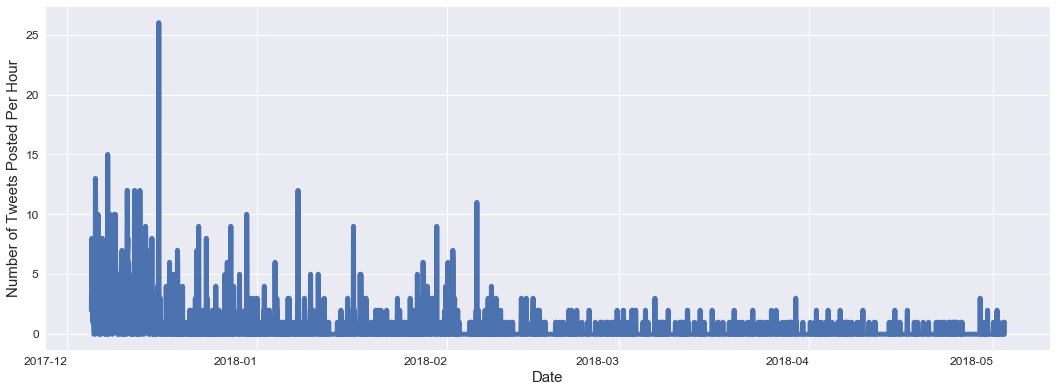

In [67]:
#Plot the volume of tweets over time of influencers
df2influencersdate.plot(figsize =(18,7), linewidth = 5, fontsize = 12)
plt.xticks(rotation = 0)
plt.xlabel('Date', fontsize = 15);
plt.ylabel('Number of Tweets Posted Per Hour', fontsize = 15);
plt.show()

In [68]:
import pandas.plotting._converter as pandacnv
pandacnv.register()

In [69]:
df2[df2.index.duplicated()]

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
datetime,,,,,,,,,,,,,
2017-12-04 22:35:17-05:00,938054172791988225,2017-12-05 15:35:17,NaN,False,False,NaN,0,0,1,# ENDSARS : Police Must Not Trigger A Revolution In Nigeria By Ignoring A Strident Call For ... http:// bit.ly/2iT2Jip,/NigeriaNewsNG/status/938054172791988225,14949750,NigeriaNewsNG
2017-12-04 22:35:54-05:00,938054327259803648,2017-12-05 15:35:54,NaN,True,False,NaN,1,0,1,# EndSARS,/owawole/status/938054327259803648,130448478,owawole
2017-12-04 22:36:21-05:00,938054441885892610,2017-12-05 15:36:21,NaN,True,False,NaN,1,0,1,"SARS need to be Educate\n\n \nNot Every Young Lad with A Laptop is a ""Yahoo Boy"" \n\nSome of us are Graphic Designers. \nSome of us are Programmers. \nSome of us are Bloggers. \nSome of us are Promoters. \nSome of us are Freelancers. \nSome of us are Analysts. \n#EndSARS pic.twitter.com/Iu7pQY6KJq",/Bolasky01/status/938054441885892610,2350364734,Bolasky01
2017-12-04 22:36:28-05:00,938054471837474816,2017-12-05 15:36:28,NaN,False,False,NaN,3,1,5,"It's unfortunate that we look up to you in times like this when people are sharing empirical stories of harrasment, murder, torture from the hands of the government institution sworn to serve and protect, but you keep mute. #EndSARS https:// twitter.com/ProfOsinbajo/s tatus/938049491659259904 …",/Twickta/status/938054471837474816,1082797064,Twickta
2017-12-04 22:37:24-05:00,938054706248798208,2017-12-05 15:37:24,True,False,False,[https://t.co/NZOqBCPhml],2,1,4,".@SenIsahMisau , ex-police officer turned senator, says ‘SARS is used to intimidate politicians’ http:// bit.ly/2BC4c09 via @thecableng #EndSARS",/thecableng/status/938054706248798208,1954402777,thecableng
2017-12-04 22:37:36-05:00,938054757201084417,2017-12-05 15:37:36,NaN,False,False,NaN,0,0,0,# EndSARS https:// twitter.com/ronaldnzimora/ status/937963799109304320 …,/Mcnowell/status/938054757201084417,65019947,Mcnowell
2017-12-04 22:37:57-05:00,938054843176046592,2017-12-05 15:37:57,NaN,False,False,NaN,0,2,0,@ CNN please give a voice to our plight. Our police force in Nigeria coducts its affairs with impunity. We want to #EndSARS,/Moli_Baba/status/938054843176046592,248859558,Moli_Baba
2017-12-04 22:39:02-05:00,938055116346855424,2017-12-05 15:39:02,NaN,False,False,NaN,0,0,0,"After reading wat moshood said about d #endsars campaign, I give up on Nigeria, d police can't silent us, nd we ré not criminals",/MORYMZ/status/938055116346855424,309355054,MORYMZ
2017-12-04 22:39:14-05:00,938055166795894784,2017-12-05 15:39:14,NaN,False,False,NaN,0,0,0,# EndSARS : Wizkid Calls For Youth Empowerment As Ebuka Shares His Own Experience With… https://www. gqbuzz.com/endsars-wizkid -calls-for-youth-empowerment-as-ebuka-shares-his-own-experience-with-operatives/ … pic.twitter.com/g4GetxeDv3,/Iamdave_dc/status/938055166795894784,398502593,Iamdave_dc


In [70]:
#groupby people with the most tweets
df2.groupby('usernameTweet')[['text']].count().nlargest(10, 'text')

,text
usernameTweet,
OfficialEndsars,2938
segalink,1263
Ice131Queen,909
Intergrity56,868
countrynewsn1,653
ERNALBEAT,515
goldgems11,427
SundayWilly,271
adewale1880,271


In [71]:
df2influencers.groupby('usernameTweet')[['text']].count().nlargest(10, 'text')

,text
usernameTweet,
segalink,1263
CACCOT1,235
iamMrBoro,47
Chydee,35
funshohenri,34
IsimaOdeh,23
Omojuwa,19
BudgITng,16
UrbanCulture06,11


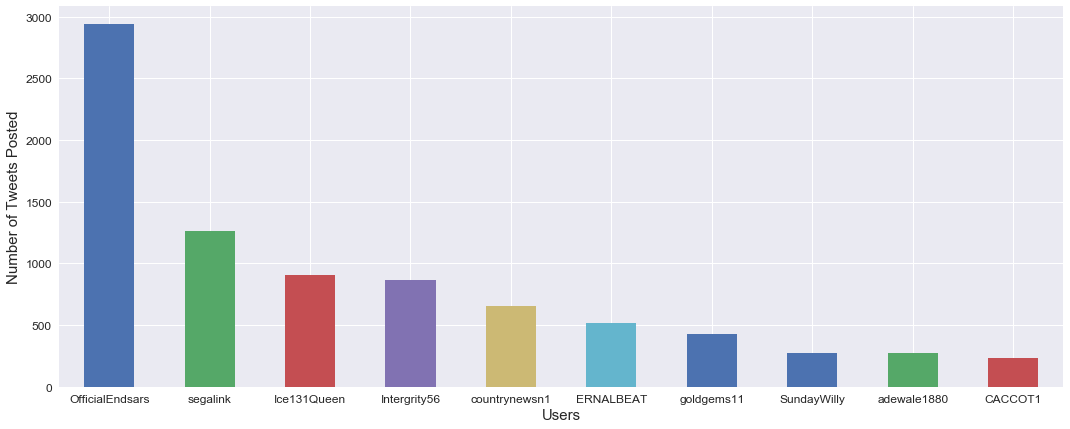

In [72]:
#Buzzmakers tweets
df2.groupby('usernameTweet')['datetime'].count().nlargest(10).plot(kind = 'bar',figsize =(18,7), linewidth = 5, fontsize = 12)
plt.xticks(rotation = 0)
plt.xlabel('Users', fontsize = 15);
plt.ylabel('Number of Tweets Posted', fontsize = 15);
plt.show()

In [73]:
buzzmakers = ['segalink','OfficialEndsars','Ice131Queen',
              'Intergrity56', 'countrynewsn1','ERNALBEAT','goldgems11',
             'SundayWilly', 'adewale1880', 'CACCOT1']
dfbuzzmakers = df2[df2['usernameTweet'].isin(buzzmakers)]
dfbuzzmakersH = dfbuzzmakers['datetime'].resample('H').count()
dfbuzzmakersH

datetime
2017-12-04 22:00:00-05:00    3 
2017-12-04 23:00:00-05:00    6 
2017-12-05 00:00:00-05:00    33
2017-12-05 01:00:00-05:00    31
2017-12-05 02:00:00-05:00    10
2017-12-05 03:00:00-05:00    21
2017-12-05 04:00:00-05:00    39
2017-12-05 05:00:00-05:00    19
2017-12-05 06:00:00-05:00    13
2017-12-05 07:00:00-05:00    5 
2017-12-05 08:00:00-05:00    3 
2017-12-05 09:00:00-05:00    0 
2017-12-05 10:00:00-05:00    2 
2017-12-05 11:00:00-05:00    3 
2017-12-05 12:00:00-05:00    4 
2017-12-05 13:00:00-05:00    24
2017-12-05 14:00:00-05:00    48
2017-12-05 15:00:00-05:00    30
2017-12-05 16:00:00-05:00    18
2017-12-05 17:00:00-05:00    10
2017-12-05 18:00:00-05:00    3 
2017-12-05 19:00:00-05:00    20
2017-12-05 20:00:00-05:00    37
2017-12-05 21:00:00-05:00    44
2017-12-05 22:00:00-05:00    27
2017-12-05 23:00:00-05:00    20
2017-12-06 00:00:00-05:00    51
2017-12-06 01:00:00-05:00    39
2017-12-06 02:00:00-05:00    17
2017-12-06 03:00:00-05:00    4 
                            .. 

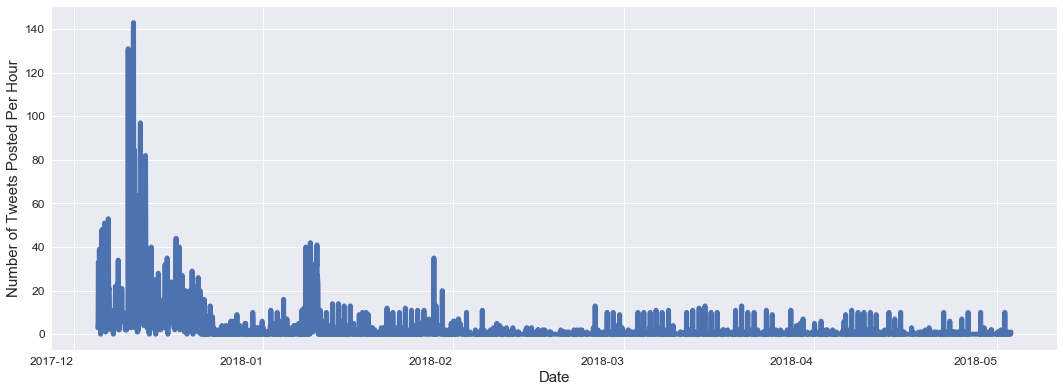

In [74]:
# volume of tweets per hour for buzzmakers
#Plot the volume of tweets over time of influencers
dfbuzzmakersH.plot(figsize =(18,7), linewidth = 5, fontsize = 12)
plt.xticks(rotation = 0)
plt.xlabel('Date', fontsize = 15);
plt.ylabel('Number of Tweets Posted Per Hour', fontsize = 15);
plt.show()

In [75]:
df2influencersdate = df2influencers[['datetime','usernameTweet']]
df2influencersdate = df2influencers[['datetime']].resample('H').count()
df2influencersdate

,datetime
datetime,
2017-12-04 22:00:00-05:00,2
2017-12-04 23:00:00-05:00,4
2017-12-05 00:00:00-05:00,8
2017-12-05 01:00:00-05:00,4
2017-12-05 02:00:00-05:00,5
2017-12-05 03:00:00-05:00,3
2017-12-05 04:00:00-05:00,1
2017-12-05 05:00:00-05:00,4
2017-12-05 06:00:00-05:00,1


In [76]:
df2influencers.groupby(['usernameTweet','datetime'])[['text']].count().nlargest(1000, 'text')

/Users/samanthasam-inimgba/orangenv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'datetime' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


text
usernameTweet datetime                 
segalink      2018-01-08 08:28:54  2   
              2018-01-08 08:28:55  2   
              2018-01-08 08:28:56  2   
              2018-01-08 08:28:57  2   
              2018-01-30 23:08:48  2   
              2018-01-30 23:08:49  2   
              2018-01-30 23:08:50  2   
BudgITng      2017-12-05 16:49:20  1   
              2017-12-05 17:22:01  1   
              2017-12-05 18:56:54  1   
              2017-12-05 19:04:23  1   
              2017-12-05 19:09:24  1   
              2017-12-05 19:14:20  1   
              2017-12-05 19:51:36  1   
              2017-12-05 21:28:47  1   
              2017-12-05 23:50:32  1   
              2017-12-06 07:19:07  1   
              2017-12-06 12:32:23  1   
              2017-12-06 12:42:31  1   
              2017-12-06 13:44:50  1   
              2017-12-06 15:08:00  1   
              2017-12-07 07:21:56  1   
              2017-12-09 17:11:04  1   
CACCOT1       2017-12-05 15:36:11  1   
              2017-12-05 16:37:10  1   
              2017-12-05 18:57:36  1   
              2017-12-05 22:03:50  1   
              2017-12-06 07:16:37  1   
              2017-12-06 07:53:05  1   
              2017-12-06 08:03:02  1   
...                               ..   
segalink      2017-12-20 00:55:33  1   
              2017-12-20 01:08:27  1   
              2017-12-20 01:11:40  1   
              2017-12-20 01:23:26  1   
              2017-12-20 08:38:48  1   
              2017-12-20 08:47:00  1   
              2017-12-20 10:09:22  1   
              2017-12-20 10:46:58  1   
              2017-12-20 10:53:38  1   
              2017-12-20 11:03:59  1   
              2017-12-20 11:32:09  1   
              2017-12-20 12:05:38  1   
              2017-12-20 12:15:52  1   
              2017-12-20 12:20:58  1   
              2017-12-20 12:22:58  1   
              2017-12-20 16:18:23  1   
              2017-12-20 18:14:15  1   
              2017-12-20 19:55:28  1   
              2017-12-20 20:01:46  1   
              2017-12-21 09:51:11  1   
              2017-12-21 15:02:49  1   
              2017-12-21 16:10:56  1   
              2017-12-21 16:39:24  1   
              2017-12-21 17:36:33  1   
              2017-12-21 19:56:02  1   
              2017-12-21 19:59:44  1   
              2017-12-21 20:09:01  1   
              2017-12-21 20:46:04  1   
              2017-12-22 08:12:26  1   
              2017-12-22 08:19:53  1   

[1000 rows x 1 columns]

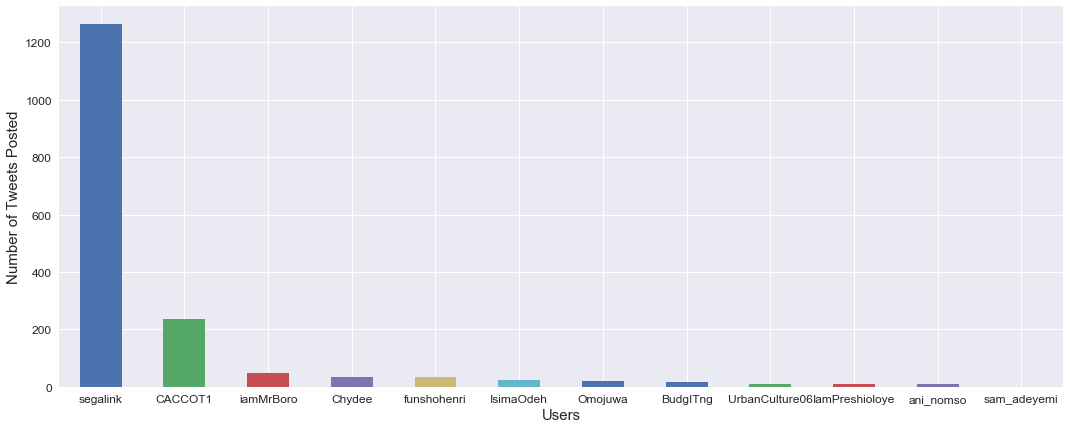

In [77]:
df2influencers.groupby('usernameTweet')['text'].count().nlargest(12).plot(kind = 'bar',figsize =(18,7), linewidth = 5, fontsize = 12)
plt.xticks(rotation = 0)
plt.xlabel('Users', fontsize = 15);
plt.ylabel('Number of Tweets Posted', fontsize = 15);

In [78]:
df2.describe()

,nbr_favorite,nbr_reply,nbr_retweet
count,82771.000000,82771.000000,82771.000000
mean,4.097208,0.485798,9.977190
std,40.602816,4.946536,89.829878
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,2.000000
max,4922.000000,412.000000,6908.000000


In [79]:
df.describe()

,nbr_favorite,nbr_reply,nbr_retweet
count,27600.000000,27600.000000,27600.000000
mean,1.731014,0.297645,2.446957
std,6.681566,1.298460,10.510341
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,2.000000
max,367.000000,116.000000,564.000000


In [80]:
#stopwords to remove noise from tweets in Sample 1
import string
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation +  ['','…', '@ ',
                                                    '&','u','http://', 
                                                    'https://','https://www',
                                                    'rt','–','endsars',
                                                    'sars','us','even',
                                                    'go','still','#endsars',
                                                    '#endsarsbrutality','#reformpoliceng',
                                                    '#endsarsnow'] 
text = df2['text']

#tokenize the tweet text
tokens = []
for txt in text.values:
    tokens.extend([t.lower().strip(":,.") for t in txt.split()])
    
filtered_tokens = [w for w in tokens if not w in stop]

In [81]:
freq_dist = nltk.FreqDist(filtered_tokens)
freq_dist.most_common(10000)


[('police', 9851),
 ('people', 6931),
 ('nigeria', 4714),
 ('campaign', 4452),
 ('@policeng', 4102),
 ('one', 3942),
 ('nigerians', 3784),
 ('like', 3742),
 ('@segalink', 3366),
 ('see', 3091),
 ('nigerian', 3025),
 ('know', 2975),
 ('end', 2562),
 ('want', 2498),
 ('please', 2491),
 ('retweet', 2426),
 ('need', 2425),
 ('must', 2344),
 ('stop', 2314),
 ('get', 2289),
 ('country', 2223),
 ('protest', 2197),
 ('say', 2030),
 ('good', 2023),
 ('rally', 2020),
 ('youths', 1966),
 ('man', 1959),
 ('come', 1915),
 ('time', 1862),
 ('brutality', 1853),
 ('state', 1835),
 ('make', 1832),
 ('tweet', 1831),
 ("can't", 1731),
 ('way', 1715),
 ('citizens', 1715),
 ('today', 1691),
 ('guys', 1679),
 ('also', 1663),
 ('youth', 1632),
 ('would', 1621),
 ('take', 1608),
 ('government', 1607),
 ('support', 1606),
 ('voice', 1578),
 ('think', 1571),
 ('#reformsars', 1562),
 ('god', 1541),
 ("let's", 1538),
 ('officers', 1509),
 ('let', 1507),
 ('men', 1472),
 ('movement', 1471),
 ('officer', 1449),
 ('

In [82]:

#preparing x and y axes to be ploted 
XY = freq_dist.items()
#pair x and y and sort the axes
XY = sorted (XY, key=lambda pair: pair[1], reverse= True)
XY.sort(key = lambda pair: pair[1], reverse = True)
limit = 30
#unpair the axes
X = [x for (x,y) in XY[:limit]]
Y = [y for (x,y) in XY[:limit]]
#Transform X into a list of numbers from a list of word tokens
range(4)
nX = range(len(X))
nX

range(0, 30)

TypeError: title() missing 1 required positional argument: 's'

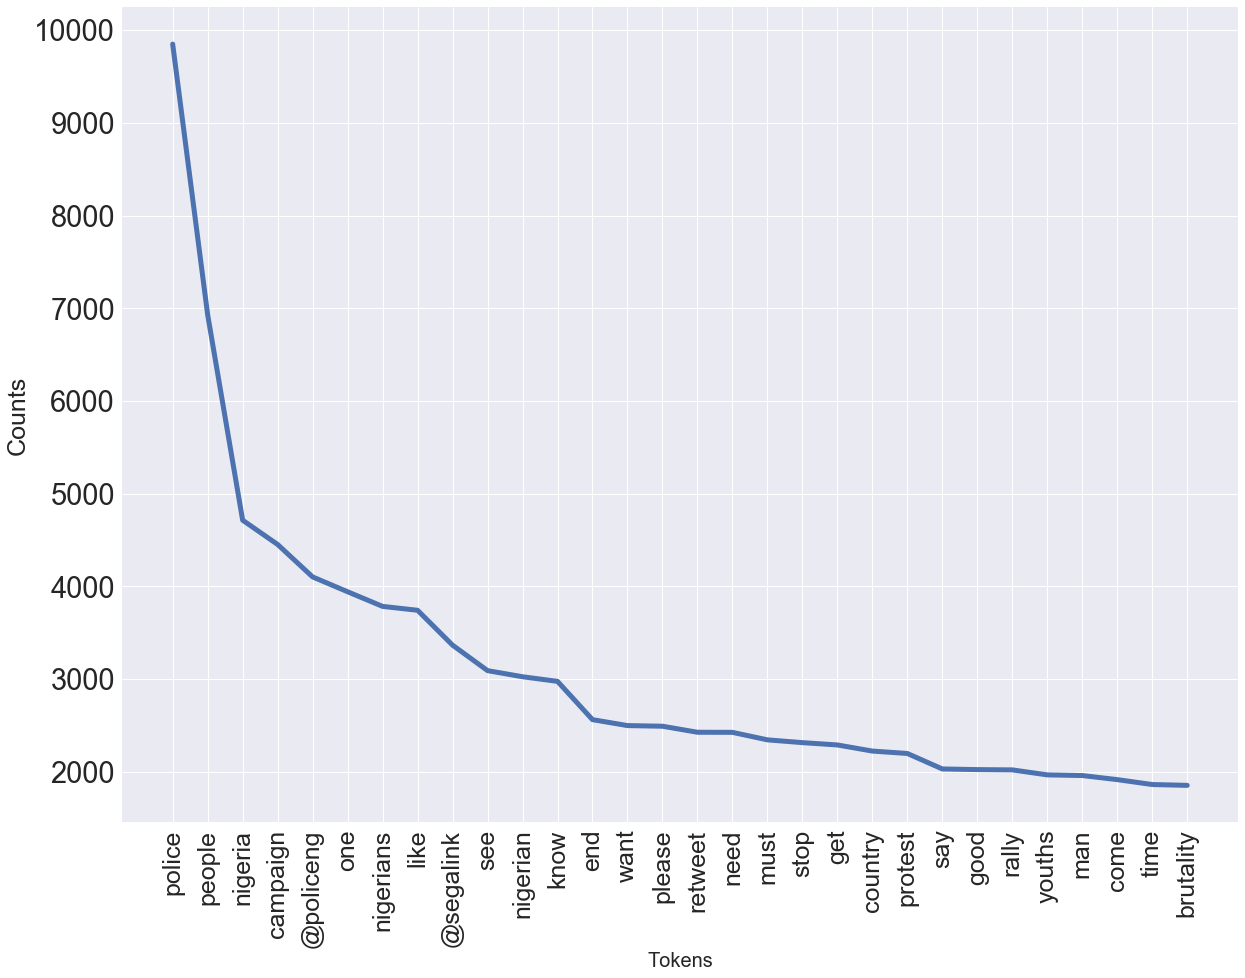

In [83]:
plt.figure(figsize =(20,15))
plt.plot(nX,Y, linewidth = 5)
plt.xticks(nX,X, rotation = 'vertical', fontsize = 25 )
plt.yticks(fontsize = 29 )
plt.xlabel('Tokens', fontsize = 20);
plt.ylabel('Counts', fontsize = 25);
plt.title(fontsize = 35)
plt.tight_layout();
plt.grid()
plt.show();

In [84]:
#Finding the most used hashtags
#stopwords to remove noise from tweets in Sample 1
import string
punctuation = list(string.punctuation)
stop =  ['#']
text = df2['text']

#tokenize the tweet text 
tokens = []
for txt in text.values:
    tokens.extend([t.lower().strip(":,.") for t in txt.split()])
    
hashtagged_tokens = [w for w in tokens if w not in stop and w.startswith('#')]
hashtagged_tokens

['#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#sars',
 '#bailisnotfree',
 '#endsars',
 '#reformsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#ogacommand',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#sars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#reformsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#sarsmustgo',
 '#reformsars',
 '#bailisfree',
 '#sarsmolestation',
 '#endsarsbrutality',
 '#endsarsnow',
 '#endsars',
 '#endsars',
 '#rochas',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#sackigp',
 '#endsars',
 '#endsars',
 '#endsarsnow',
 '#endviolence',
 '#endsarsbrutality',
 '#endsars',
 '#endsars',
 '#endsars',
 '#saveyouths',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsars',
 '#endsa

In [85]:
freqhash_dist = nltk.FreqDist(hashtagged_tokens)
freqhash_dist.most_common(10000)

[('#endsars', 124238),
 ('#endsarsbrutality', 8200),
 ('#reformpoliceng', 6719),
 ('#endsarsnow', 2607),
 ('#reformsars', 1562),
 ('#sars', 1215),
 ('#supportsars', 1135),
 ('#endsarsrally', 562),
 ('#fuelscarcity', 497),
 ('#ajstream', 477),
 ('#nigeria', 474),
 ('#news', 294),
 ('#reformpolice', 269),
 ('#endpolicebrutality', 186),
 ('#freemotoni', 151),
 ('#bbnaija', 149),
 ('#ourmumudondo', 131),
 ('#policebrutality', 124),
 ('#police', 122),
 ('#sarsmustgo', 113),
 ('#scrapsars', 113),
 ('#sackyomishogunle', 103),
 ('#olic4', 102),
 ('#lagos', 100),
 ('#reformthepolice', 98),
 ('#freeegwuatuchukzandprincedan', 96),
 ('#endfuelscarcity', 84),
 ('#endsarz', 78),
 ('#viral', 75),
 ('#sackigpnow', 74),
 ('#manlikeatiku', 74),
 ('#nigeriannews', 72),
 ('#welovenigeria', 71),
 ('#mynigeriandream', 71),
 ('#viralposts', 71),
 ('#teamkaywise', 70),
 ('#restructurenigeria', 68),
 ('#endbadsars', 64),
 ('#policeaccountability', 64),
 ('#newnigeria', 62),
 ('#sarsbrutality', 59),
 ('#naija',

In [86]:
#preparing x and y axes to be ploted 
XY = freqhash_dist.items()
#pair x and y and sort the axes
XY = sorted (XY, key=lambda pair: pair[1], reverse= True)
XY.sort(key = lambda pair: pair[1], reverse = True)
limit = 30
#unpair the axes
X = [x for (x,y) in XY[:limit]]
Y = [y for (x,y) in XY[:limit]]
#Transform X into a list of numbers from a list of word tokens
range(4)
nX = range(len(X))
nX

range(0, 30)

TypeError: title() missing 1 required positional argument: 's'

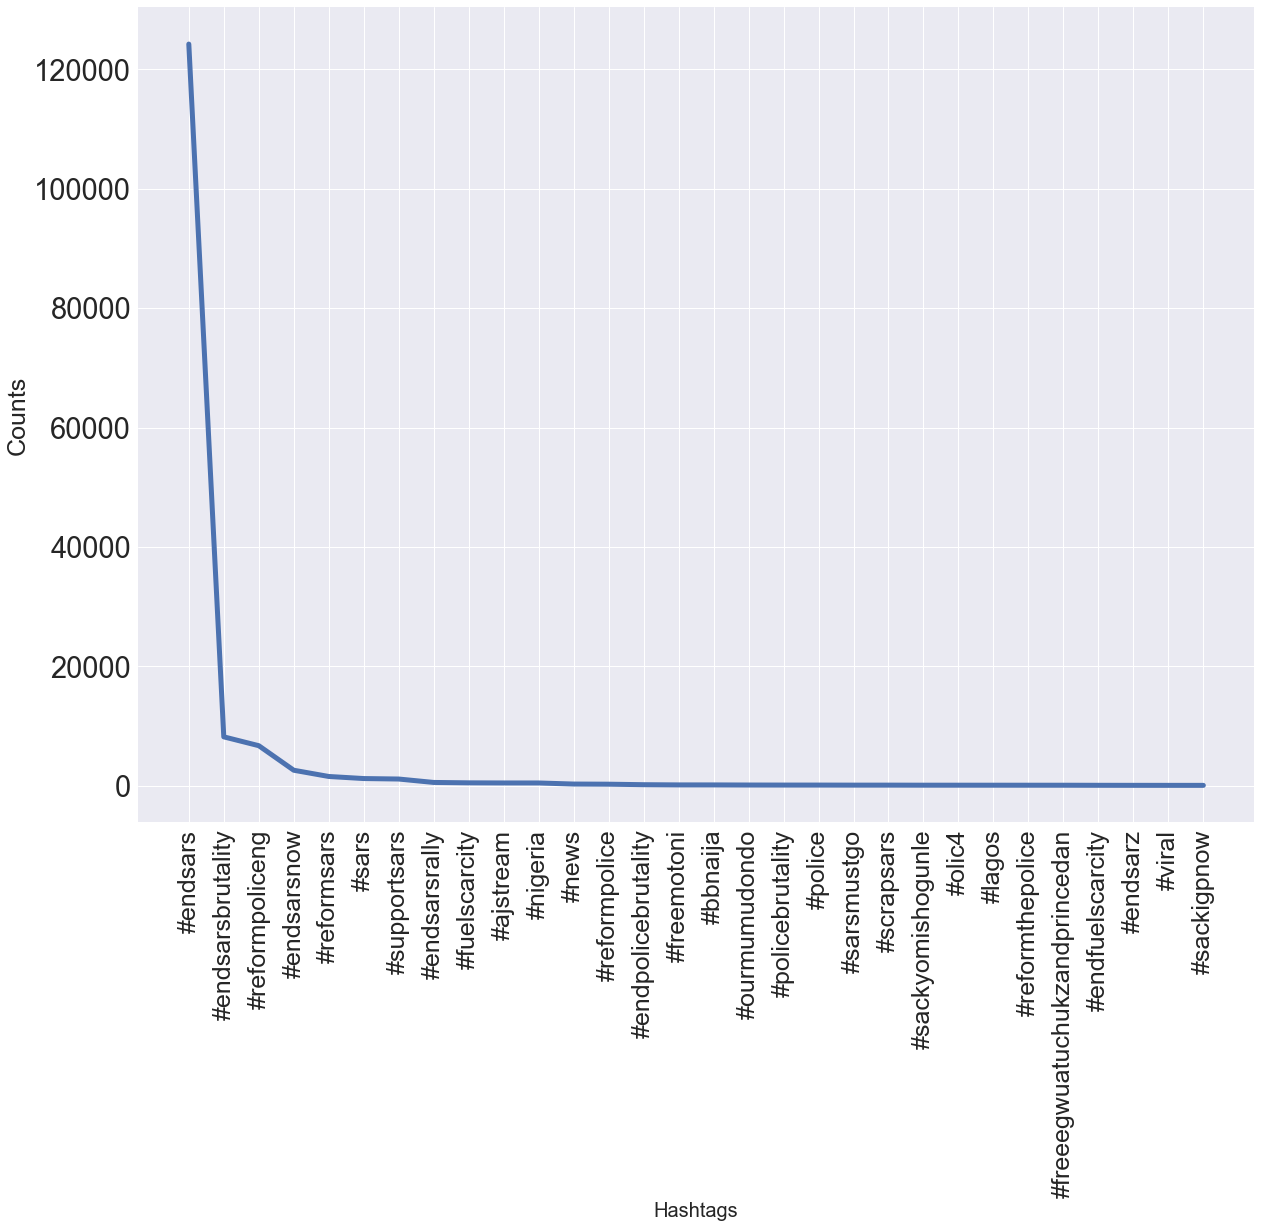

In [87]:
plt.figure(figsize =(20,15))
plt.plot(nX,Y, linewidth = 5)
plt.xticks(nX,X, rotation = 'vertical', fontsize = 25 )
plt.yticks(fontsize = 29 )
plt.xlabel('Hashtags', fontsize = 20);
plt.ylabel('Counts', fontsize = 25);
plt.title(fontsize = 35)
plt.tight_layout();
plt.grid()
plt.show();

In [ ]:
! pip install wordcloud


In [88]:
text = freq_dist.most_common(50)

#join tweets to a single string
words = ' '.join(freq_dist)




In [89]:
! pip install Pillow

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [90]:
from PIL import Image

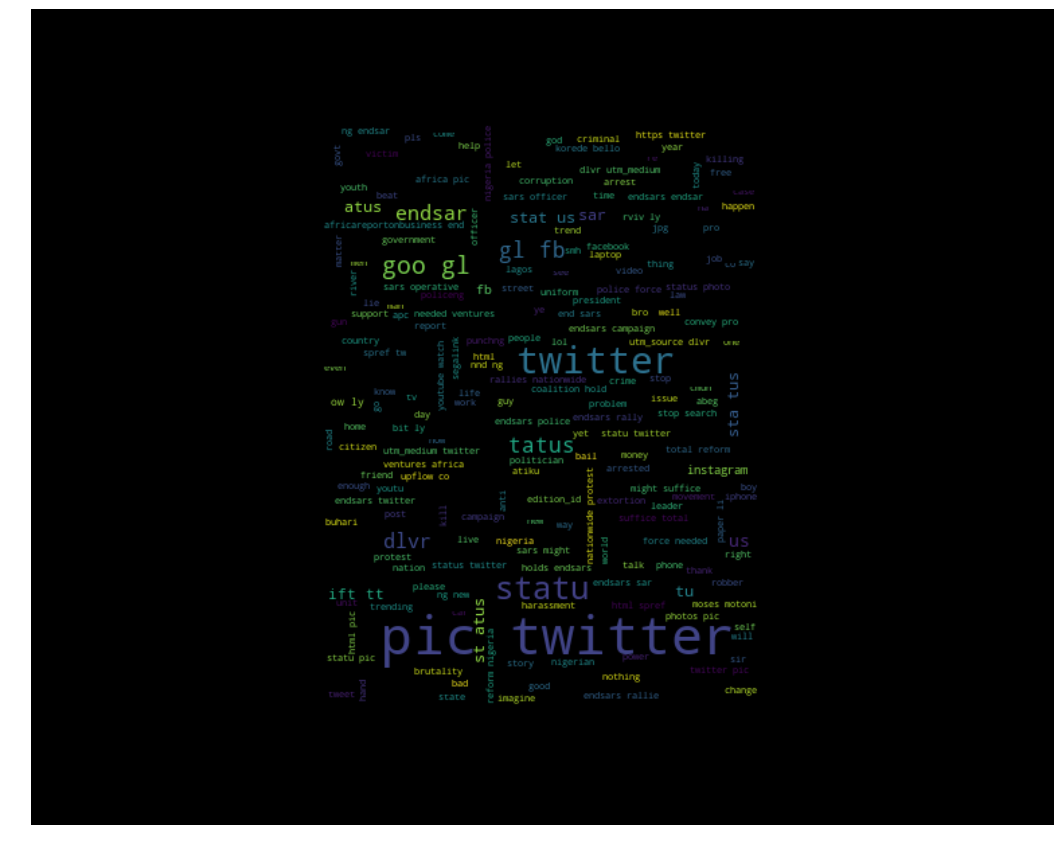

In [94]:
from wordcloud import WordCloud, STOPWORDS


stopwords = set(STOPWORDS)
#Read mask
police_image = Image.open('grey.png')
police_mask = np.array(police_image)

#Create word cloud object

wc = WordCloud(background_color="black",  mask = police_mask, stopwords = stopwords)
#Generate word cloud

wc.generate(words)

#show word cloud
plt.figure(figsize =(20,15))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
print(police_mask.shape)

In [98]:
police_image = Image.open("SARS_Official_Silhoutte.png")
police_image = police_image.convert("L") # convert image to black and white
police_image.mode = "L"
police_image = police_image.point(lambda x: 0 if x<128 else 255)
police_image.save('grey.png')